# Анализ продаж магазина компьютерных игр

Интернет-магазин продаёт компьютерные игры по всему миру. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Предоставлены данные до 2016 года. Предположительно сейчас декабрь 2016 г., и планируется компания на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируются ли продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
Аббревиатура ESRB (Entertainment Software Rating Board) в наборе данных — ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


## Ознакомление с предоставленными данными и их изучение

### Изучение предоставленных данных

In [1]:
#импоpт необходимых библиотек и методов
import math as mt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

from math import factorial
from scipy import stats as st

In [2]:
warnings.simplefilter('ignore')#отключение предупреждений

In [3]:
df = pd.read_csv(r'C:\Users\lebeda\Yandex_Practicum\Yandex_projects\data_sets\prjkt_5(sp8_sum1)\games.csv') #загрузка датасета

In [4]:
df.head(10) #вывод первых десяти строк, получение общего вида таблицы

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
df.info() #получение сводной информации о содержании таблицы

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Исходя из полученной информации, таблица о продажах игр содержит 16715 строк и 11 столбцов. Типы используемых данных - вещественное число (float) и object.

Согласно приложенному описанию данных таблица содержит следующую информацию:

- Name — название игры;
- Platform — платформа;
- Year_of_Release — год выпуска;
- Genre — жанр игры;
- NA_sales — продажи в Северной Америке (миллионы проданных копий);
- EU_sales — продажи в Европе (миллионы проданных копий);
- JP_sales — продажи в Японии (миллионы проданных копий);
- Other_sales — продажи в других странах (миллионы проданных копий);
- Critic_Score — оценка критиков (максимум 100);
- User_Score — оценка пользователей (максимум 10);
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


In [6]:
df.isna().sum() #получение данных о количестве пропусков в столбцах

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Пропуски данных присутсвуют в 6 столбцах из 11. 


In [7]:
df.duplicated().sum() #получение о количестве полных дубликатов строк

0

Полных дубликатов строк не выявлено.


In [8]:
df.describe()#получение описательных статистик по столбцам  с числовым типом данных

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Предварительный анализ продаж позволяет понять, что самым большим рынком для компьютерных игр является рынок Северной Америки, далее в порядке убывания - суммарные продажи в других странах, Евросоюз, Япония. Диапазон оценок критиков в представленной таблице от 13 до 98. Самый ранний год выпуска представленных игр - 1980, самый поздний - 2016.

In [9]:
for column in df: #получение уникальных значений столбцов и их количества
        print(column, df[column].unique())
        print('Количество уникальных значений в стобце', column, df[column].nunique())
        print()


Name ['Wii Sports' 'Super Mario Bros.' 'Mario Kart Wii' ...
 'Woody Woodpecker in Crazy Castle 5' 'LMA Manager 2007'
 'Haitaka no Psychedelica']
Количество уникальных значений в стобце Name 11559

Platform ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']
Количество уникальных значений в стобце Platform 31

Year_of_Release [2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]
Количество уникальных значений в стобце Year_of_Release 37

Genre ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]
Количество уникальных значений в стобце Genre 12

NA_sales [4.136e+01 2.908e+01 1.568e+01 1.561e+01 1.127e

Анализ уникальных значений столбцов показывает, что таблица содержит информацию о 11559 уникальных играх в 12 жанрах на 31 игровой платформе, созданных в течении 37 лет (до 2016 года). Для оценки игр используются разные числовые шкалы: для критиков это шкала до 100, для пользователей(игроков)- до 10. Рейтинг от организации ESRB представлен 8 уникальными значениями оценок в нечисловом формате.

Следует также отметить, что пользователи используют для оценки игры кроме числовых значений аббревиатуру "tbd" - это общепринятое сокращение "to be determitated" - то есть "будет определен", то есть это оцнеки пользователей, которые на настоящий момент времени не определены. 


In [10]:
df.columns  #получение списка названий столбцов

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Наименование столбцов приведены с использованием разного регистра, "змеинный" стиль не выдержен.


### Вывод

Каждая строка таблицы содержит блок информации с описанием игр (наименование, жанр, год выхода, поддерживающая игровая платформа), блок информации с объемом продаж на различных рынках (Северная Америка, Евросоюз, Япония, другие страны), блок информации об оценках и рейтинге (оценки пользователей, критиков, рейтинг авторитетной организации в области компьютерных игр). Таблица включает данные о 11559 уникальных играх в 12 жанрах на 31 игровой платформе, созданных в течении 37 лет (с 1980 по 2016 год). В 6 столбцах из 11 присутсвуют пропуски данных. Полные дубликаты отсутсвуют.

## Предобработка данных

### Переименование названий столбцов

Для соблюдения "змеинного" стиля приведем названия столбцов к нижнему регистру.

In [11]:
df.columns = df.columns.str.lower() #приведение наименования столбцов к нижнему регистру

In [12]:
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Изменение типов данных

Анализ содержания значений столбца 'year_of_release' - год выпуска показывает, что для данного столбца корректнее использовать формат временного периода, данные соответсвуют определенному году.

In [13]:
#df['year_of_release'] = pd.to_datetime(df['year_of_release'], format='%Y').dt.to_period('Y')
df['year_of_release'] = df['year_of_release'].astype('Int64')

В столбце 'critic_score' исходя из анализа содержимого используются вещественные числа (до 100), дробные части которых всегда равны 0. Приведем их к целочисленному типу 'int'.

In [14]:
df['critic_score'] = df['critic_score'].astype('Int64')

Для столбца 'user_score' характерно наличие нечисловых значений "tbd" -сокращение "to be determitated" - то есть значение "будут определены" по сути это строчное описание отсутсвующих числовых данных, и логичным бы выглядела замена таких значений на пропуски числовых значений - NaN.

Проведем замену "tbd" на NaN.

In [15]:
df['user_score'] = df['user_score'].replace('tbd', np.nan) #замена аббривеатур 'tbd' на пропуски

Также следует отмтетить, что при исследовании значений в столбце 'user_score' значения приведены в нечисловом формате (строки), хотя по сути таковыми являются. Приведем их числовому типу.

In [16]:
df['user_score'] = pd.to_numeric(df['user_score']) #приведение к числовому типу значений столбца 'user_score'

В остальных столбцах в замене типов данных нет необходимости.

### Заполнение пропущенных значений

Как было отмечено ранее в 6 столбцах из 11 присутсвуют пропущенные значения.

В столбце 'genre' пропущено два значения, можно попытаться заполнить эти пропуски на основании названия игр и информации о них. Изучим строки с пропусками в жанре игр.

In [17]:
df.query('genre.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Из полученных данных видно, что для двух игр с пропусками в столбце 'genre' также присутсвуют пропуски и в названии, оценках и рейтинге. Адекватное заполнение пропусков в столбцах 'name' и 'genre' не представляется возможным. Проведем удаление строк, которые их содержат. Потеря данных незначительна (2 строки из 16714)

In [18]:
df.dropna(subset=['name'],inplace=True) #удаление строк с пропусками в столбцах 'name' и 'genre'
df.query('genre.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


В столбце 'year_of_release' 269 пропущенных значений. Заполнить год выпуска игры можно исходя из следующих соображений: как правило компании-разработчики компьютерных игр выпускают игру сразу на нескольких платформах в один год, однако, есть исключения, когда популярная в свое время какая-либо игра на одной из платформ только с течением времени реализуется на других. Таким образом, если в исходной таблице найдены игры с одинаковым названием, а год их выпуска одинаков, то для игры с таким же названием, но на другой платформе с пропуском в годе выпуска можно использовать значение года выпуск на других платформах (если количество уникальных значений годов выпуска этой игры не более одного).

Создадим список игр для которых пропущены значения года выпуска.

In [19]:
no_year_game_list = df.query('year_of_release.isna()')['name'].drop_duplicates().tolist()
#список уникальных названий игр с пропущенным годом выпуска

In [20]:
no_year_game_dict = {} 
#созданияе словаря годов выпуска для игр с пропущенным значениями в столбце 'year_of_release'
for i in no_year_game_list:
    a = df.query('name == @i')['year_of_release'].dropna().unique()
    for k in a:
        if len(a) == 1:
            no_year_game_dict[i] = k
    
no_year_game_dict

{'Madden NFL 2004': 2003,
 'FIFA Soccer 2004': 2003,
 'LEGO Batman: The Videogame': 2008,
 'LEGO Indiana Jones: The Original Adventures': 2008,
 'Call of Duty 3': 2006,
 'Call of Duty: Black Ops': 2010,
 'LEGO Harry Potter: Years 5-7': 2012,
 'NASCAR Thunder 2003': 2002,
 'Rhythm Heaven': 2008,
 'The Lord of the Rings: War in the North': 2011,
 'Madden NFL 07': 2006,
 'MLB SlugFest 20-03': 2002,
 'Shaun White Snowboarding': 2008,
 'Madden NFL 11': 2010,
 'The Chronicles of Narnia: The Lion, The Witch and The Wardrobe': 2005,
 'Metal Gear Solid 2: Substance': 2002,
 'The Golden Compass': 2007,
 'Madden NFL 06': 2005,
 'NASCAR: Dirt to Daytona': 2002,
 'Madden NFL 2002': 2001,
 'Def Jam: Fight for NY': 2004,
 'NBA Street Vol. 2': 2003,
 'Wet': 2009,
 'Tiger Woods PGA Tour 07': 2006,
 'NBA Live 2003': 2002,
 'Tropico 4': 2011,
 'Bejeweled 3': 2010,
 'Custom Robo': 2004,
 'Final Fantasy XI': 2006,
 'Singularity': 2010,
 'Star Wars Jedi Knight II: Jedi Outcast': 2002,
 'Harvest Moon: The Ta

In [21]:
len(no_year_game_dict) #количество уникальных записей словаря для игр с пропущенным годом выпуска

87

Для заполнения пропусков столбца 'year_of_release' создадим дополнительный столбец 'year_of_release1' по полученному словарю, где ключами словаря будут служить значения столбца 'name'. Заполним пропуски столбца 'year_of_release' значениями столбца  'year_of_release1', который затем удалим.

In [22]:
df['year_of_release1'] = df['name'].map(no_year_game_dict)
df['year_of_release'] = df['year_of_release'].fillna(df['year_of_release1']) #замена пропусков по словарю
df = df.drop('year_of_release1', 1)

In [23]:
df.isna().sum()

name                  0
platform              0
year_of_release     158
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

В столбце **'year_of_release'** заполнен 111 пропуск. Остальные пропуски не подлежат адекватной замене, потеря данных незначительна.

In [24]:
df.dropna(subset=['year_of_release'],inplace=True) #удаление строк с пропусками в столбцах 'name' и 'genre'
df.query('year_of_release.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [25]:
no_cs_game_list = df.query('critic_score.isna()')['name'].drop_duplicates().tolist()
#список уникальных названий игр с пропущенным годом выпуска

In [26]:
no_cs_game_list

['Super Mario Bros.',
 'Pokemon Red/Pokemon Blue',
 'Tetris',
 'Duck Hunt',
 'Nintendogs',
 'Pokemon Gold/Pokemon Silver',
 'Super Mario World',
 'Pokemon Diamond/Pokemon Pearl',
 'Super Mario Land',
 'Super Mario Bros. 3',
 'Pokemon Ruby/Pokemon Sapphire',
 'Pokemon Black/Pokemon White',
 'Pokémon Yellow: Special Pikachu Edition',
 'Call of Duty: Black Ops 3',
 'Pokemon X/Pokemon Y',
 'Super Mario 64',
 'Pokemon HeartGold/Pokemon SoulSilver',
 'Pokemon Omega Ruby/Pokemon Alpha Sapphire',
 'Super Mario Land 2: 6 Golden Coins',
 'Super Mario All-Stars',
 'Pokemon FireRed/Pokemon LeafGreen',
 'Mario Kart 64',
 'Donkey Kong Country',
 'Minecraft',
 'Super Mario Kart',
 'GoldenEye 007',
 'Pokemon Black 2/Pokemon White 2',
 'Mario & Sonic at the Olympic Games',
 'Star Wars Battlefront (2015)',
 'Pac-Man',
 'The Legend of Zelda: Ocarina of Time',
 'Crash Bandicoot 2: Cortex Strikes Back',
 'Super Smash Bros. for Wii U and 3DS',
 'Super Mario Bros. 2',
 'Pokemon Sun/Moon',
 'Mario Kart: Doubl

Значения столбцов оценок и рейтинга (**'critic_score', 'user_score', 'rating'**) сугубо индивидуальны для каждой конкретной игры даже с учетом выпуска ее на конкретной платформе, заполнение пропусков средними, или каким-либо граничными значениями нерационально - есть вероятность получить необъективные значения, которые скажутся на общих выводах. Пропуски в данных столбцах заполнять не будем.

Для столбца **'rating'** отметеим, что оценка 'RP' («Rating Pending» — «Рейтинг ожидается») установленная организацией "ESRB' аналогична строчному описанию пропусков, так как данные о рейтинге по сути отсутсвуют.
Найдем строки с подобным рейтингом игр и произведем его замену на пропуски.

In [27]:
df.query('rating == "RP"') #игры с рейтингом ESRB "RP"

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14270,Supreme Ruler: Cold War,PC,2011,Strategy,0.0,0.03,0.0,0.01,63,6.8,RP
16180,WRC: FIA World Rally Championship,PC,2005,Racing,0.0,0.01,0.0,0.00,65,NaN,RP


In [28]:
df['rating'] = df['rating'].replace('RP', np.nan) #замена рейтинга 'RP' на пропуски

### Подсчет значений и добавление столбца с суммарными продажами во всех регионах

Определим суммарные объемы продаж игр сложением продаж по всем представленным регионам.

In [29]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
#добавление столбца с суммарными продажами 

### Вывод

В результате предобработки данных произведено: 
- замена наименований столбцов согласно "змеинному" стилю;
- замена типов данных: 'year_of_release' - приведен к временному формату (период-год), 'critic_score' - приведен к целочисленному типу (Int64), 'user_score' - после замены аббревиатуры "tbd" - к формату вещественного числа (float);
- замена пропущенных значений (адекватная замена произведена в 111 строках столбца 'year_of_release'), в столбце 'rating' аббревиатура "RP" заменена на пропуски;
- расчет значений и добавление столбца с сумарными объемами продаж по всему миру 'total_sales'.

## Исследовательский анализ данных

### Исследование динамики объемов выпущенных игр

Рассчитаем и проанализируем объем игр, выпущенных на всех платформах,
по годам.

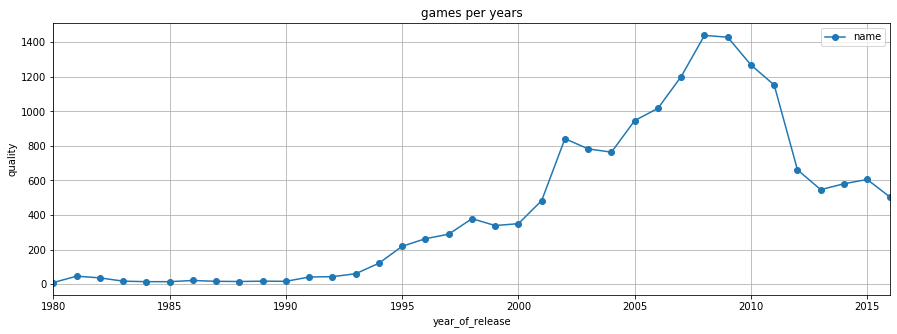

In [30]:
df_game_for_year = df.pivot_table(index = 'year_of_release', values = 'name', aggfunc='count')
df_game_for_year.plot(grid=True, figsize=[15,5], marker='o')
plt.title(label='games per years')
plt.ylabel('quality')
plt.legend(loc='upper right')
plt.show()

In [31]:
df_game_for_year

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


In [32]:
df_game_for_year.describe()

,name
count,37.000000
mean,447.432432
std,455.593236
min,9.000000
25%,36.000000
50%,339.000000
75%,764.000000
max,1440.000000


Как видно из полученных данных,на временном интервале в 37 лет бурный рост индустрии компьтерных игр начался в 90-х годах, до этого момента количество выпускаемых в год игр не превышало несколько десятков, на пике - в 2008-2009 годах было выпущено 1440 и 1430 игр соответсвенно. Вероятно это связано с распотранением интернета, ростом технических возможностей вычислительной техники и игровых устройств, совершенствованием технологий создания самих игр, повышеним их доступности для широких масс, дублированием игр на разных платформах. Этот процесс отражает одну из граней общей "цифровизации" общества.  После 2009 года намечается спад в колличестве выпускаемых игр, что возможно отражет процесс свзанный с тем, что компаниии-производители игр реструктурируют прибыль, которая теперь привлекается не только за счет продаж самой игры но и ее опций, многие игры переходят в он-лайн пространство.

### Исследование динамики объемов продаж по игровым платформам

Создадим сводную таблицу сумарных продаж по платформам и построим графику их изменения во времени.

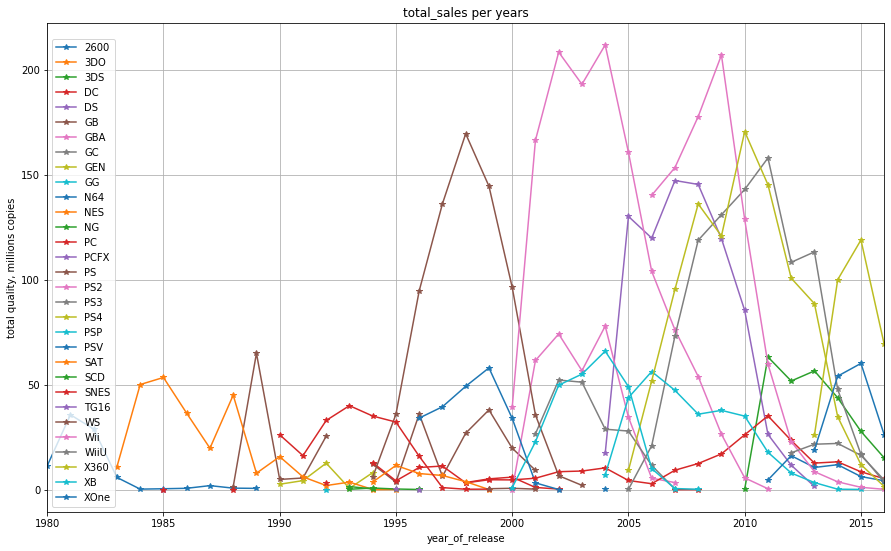

In [33]:
df_game_platform_total_sales = df.pivot_table(index = 'year_of_release', columns='platform', values = 'total_sales', aggfunc='sum')
df_game_platform_total_sales.plot(grid=True, figsize=[15,9], marker='*')
plt.title(label='total_sales per years')
plt.ylabel('total quality, millions copies')
plt.legend(loc='lower left')
plt.show()

In [34]:
df_game_platform_total_sales

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1980,11.38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1981,35.68,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1982,28.88,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1983,5.84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1984,0.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1985,0.45,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986,0.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1987,1.94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,0.74,NaN,NaN,NaN,NaN,1.43,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df_game_platform_total_sales.describe()

platform,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,GG,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
count,10.000000,2.000000,7.000000,7.000000,11.000000,13.000000,8.000000,7.000000,5.000000,1.00,...,6.000000,2.000000,10.000000,1.00,3.000000,11.000000,5.000000,12.000000,9.000000,4.000000
mean,8.648000,0.050000,36.930000,2.278571,73.116364,19.571538,39.216250,28.370000,5.670000,0.04,...,5.598333,0.930000,20.004000,0.16,0.473333,82.119091,16.438000,80.550833,28.276667,39.830000
std,13.031075,0.042426,23.247594,2.543550,61.644406,18.465580,32.727199,19.000133,4.771095,NaN,...,3.967591,0.806102,15.479666,NaN,0.200333,80.101105,7.068244,57.716995,26.688184,20.313977
min,0.270000,0.020000,0.300000,0.020000,0.020000,1.430000,0.070000,0.270000,0.650000,0.04,...,0.090000,0.360000,0.220000,0.16,0.280000,0.180000,4.600000,1.520000,0.180000,18.960000
25%,0.640000,0.035000,21.460000,0.165000,14.470000,5.570000,4.945000,19.085000,2.600000,0.04,...,3.692500,0.645000,4.722500,0.16,0.370000,6.170000,16.350000,29.045000,0.990000,24.352500
50%,1.340000,0.050000,43.760000,1.070000,85.350000,12.180000,45.600000,27.910000,4.330000,0.04,...,5.295000,0.930000,21.185000,0.16,0.460000,59.790000,17.560000,91.995000,22.840000,40.110000
75%,9.995000,0.065000,54.165000,4.270000,124.975000,26.900000,64.687500,40.010000,8.130000,0.04,...,7.460000,1.215000,32.785000,0.16,0.570000,146.800000,21.650000,124.632500,49.780000,55.587500
max,35.680000,0.080000,63.200000,5.990000,147.230000,64.970000,77.910000,52.220000,12.640000,0.04,...,11.570000,1.500000,40.020000,0.16,0.680000,206.970000,22.030000,170.550000,65.970000,60.140000


Из полученных данных видно что "жизненный" цикл платформы имеет во многих случаях волнообразный характер: платформа появляется, продажи увеличиваются, достигают пика, продажи уменьшаются, платформа исчезает. Особенно четко такая зависимость заметна для платформ, появившихся после 1990 года и имеющих большые объемы продаж.

Построим графики продаж по годам отдельно для каждой платформы, появившейся после 1990 года для более подробного анализа их циклов существования, для наглядности построения будем проводить в одинаковых временных рамках, процесс построения автоматизируем.

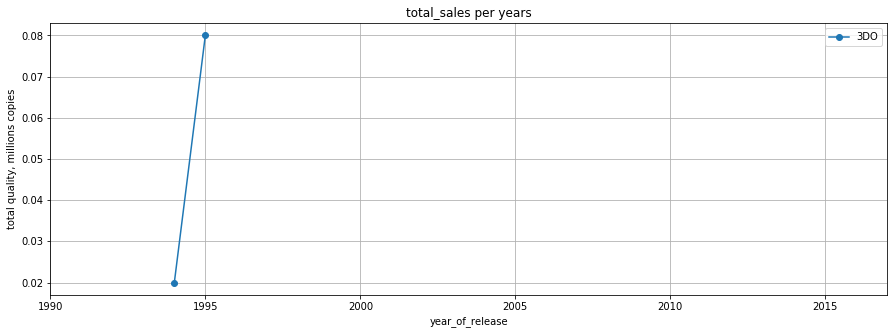

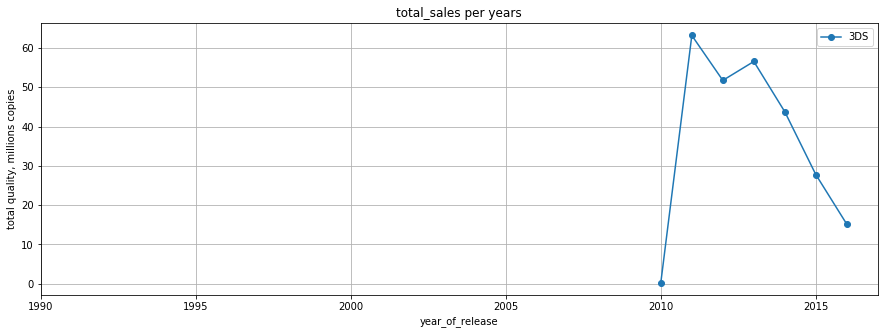

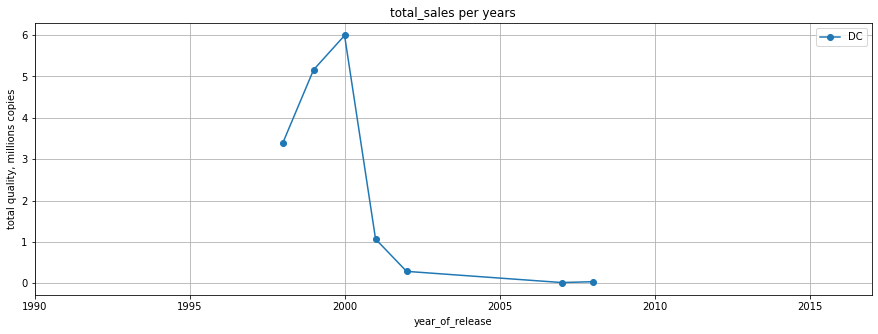

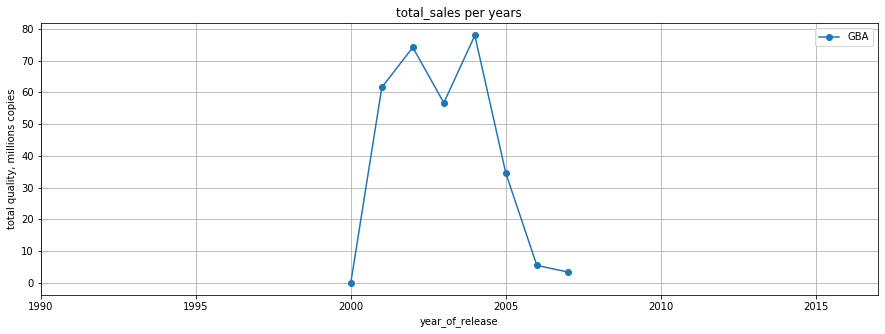

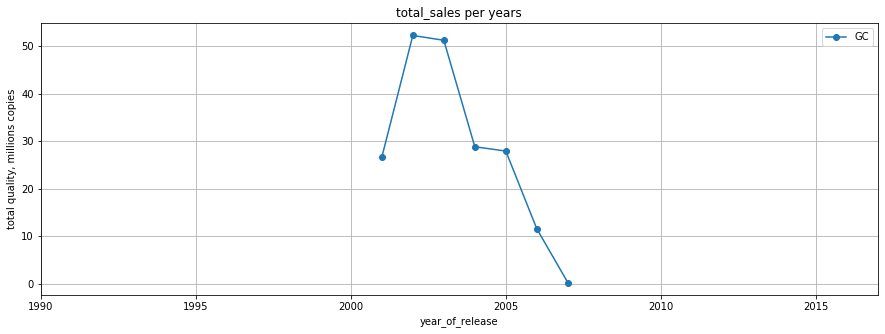

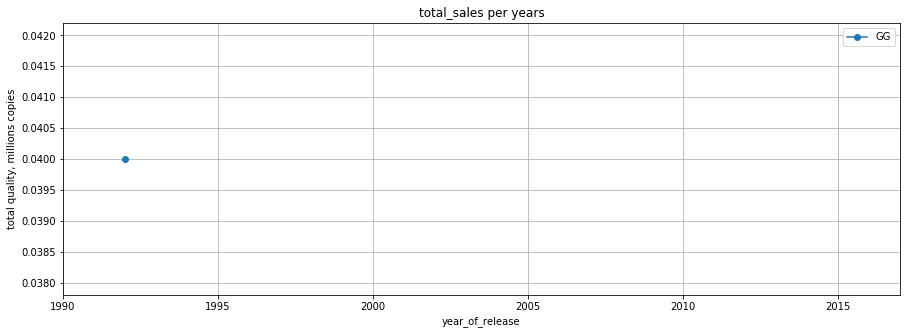

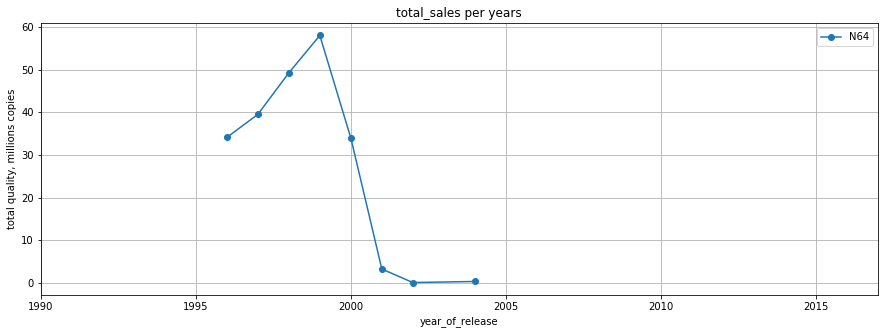

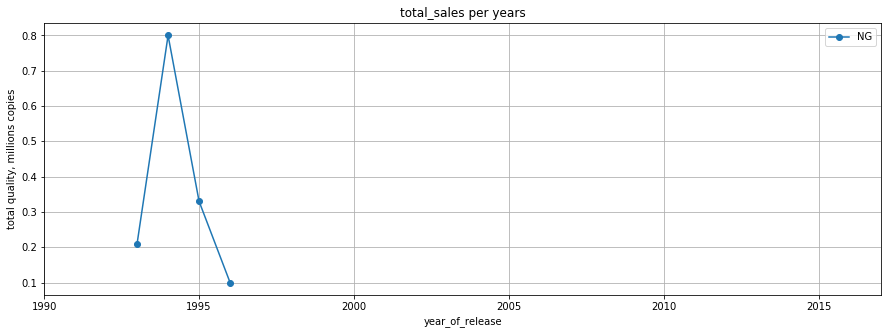

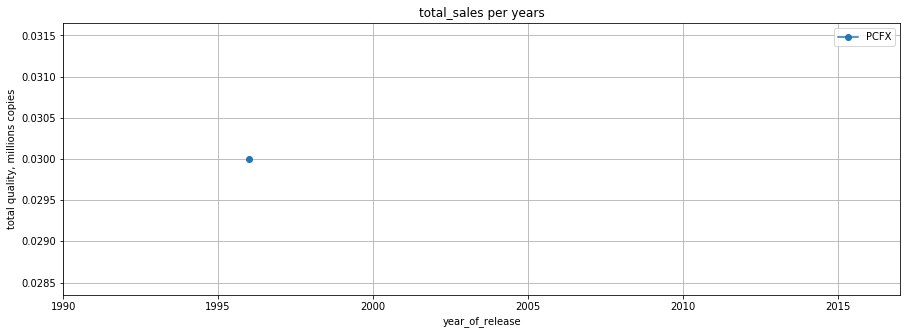

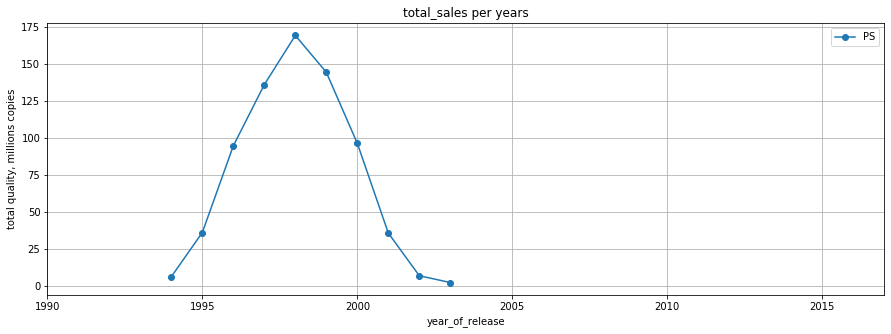

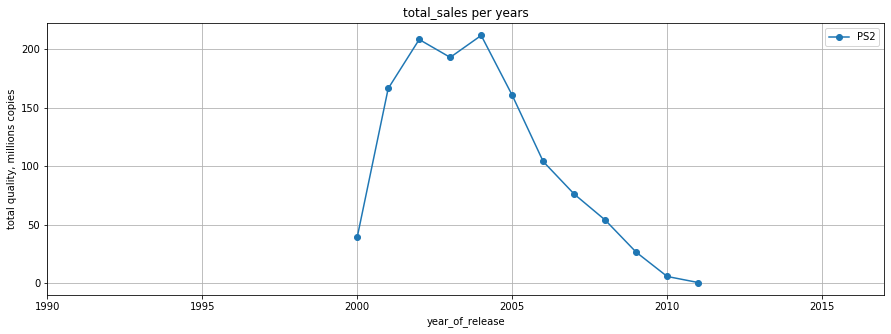

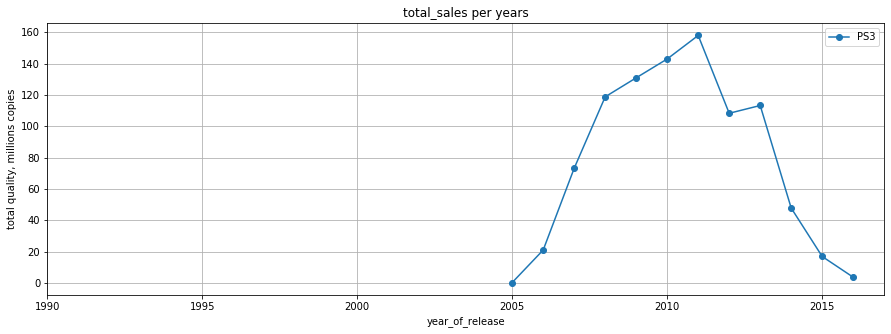

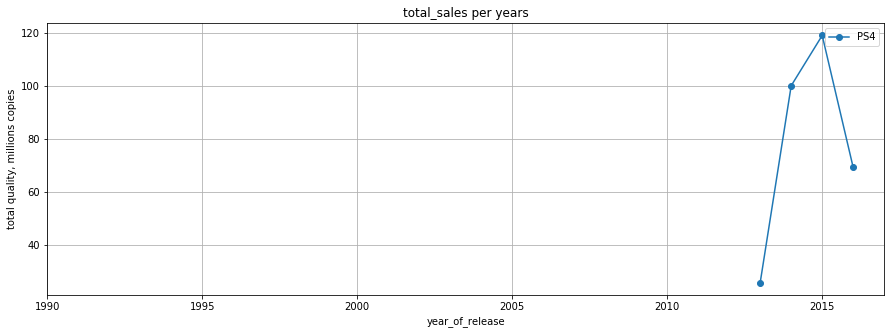

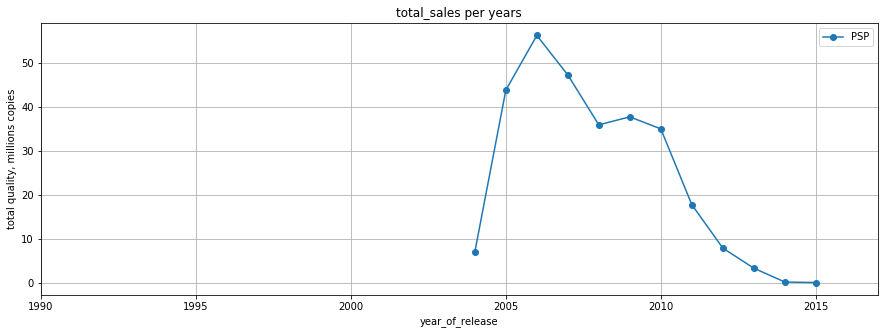

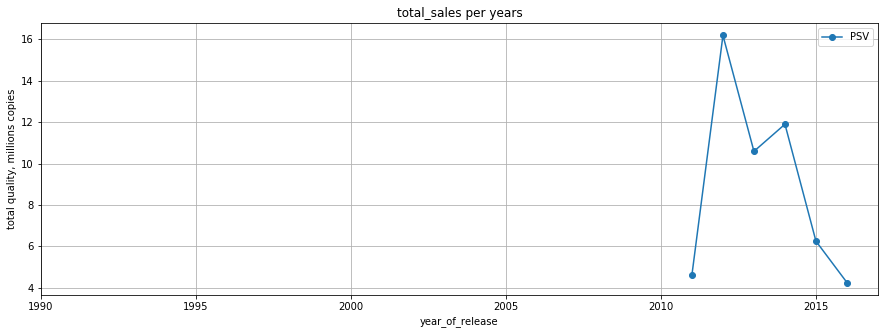

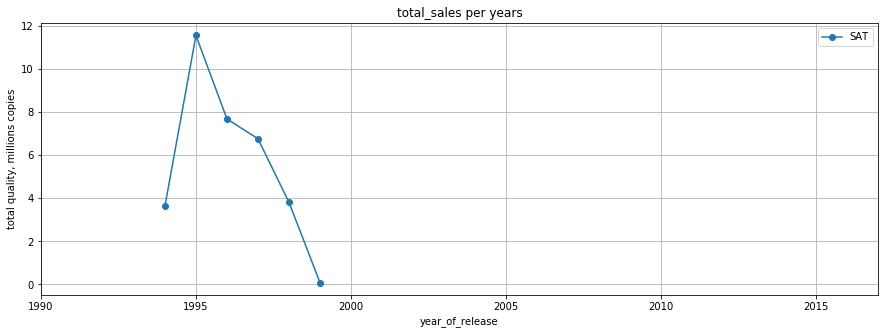

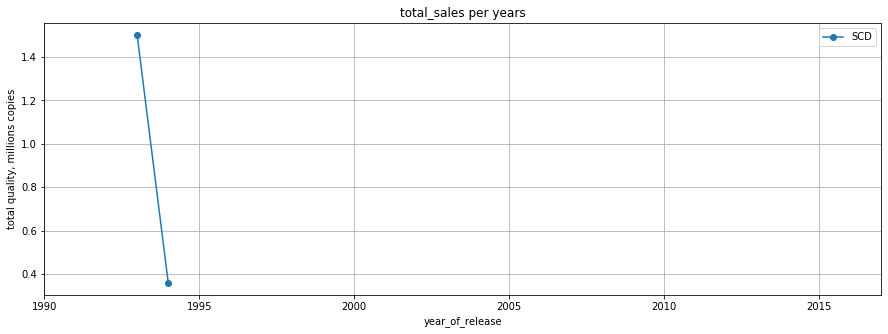

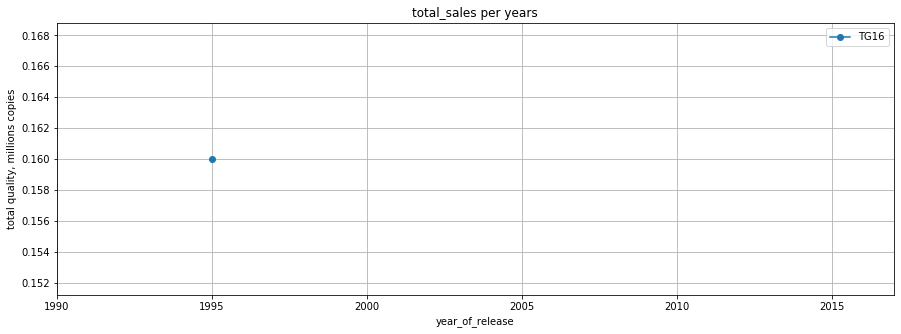

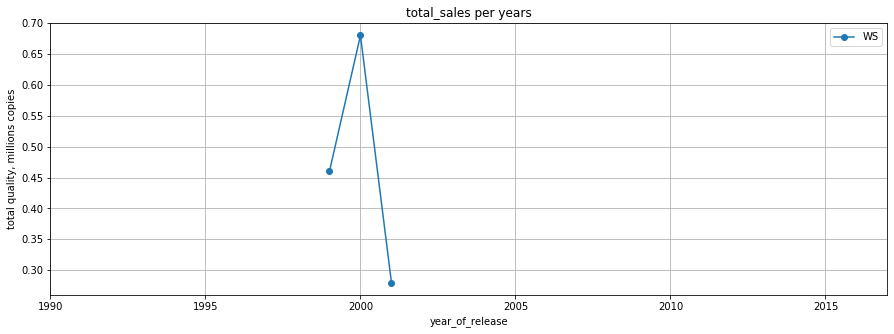

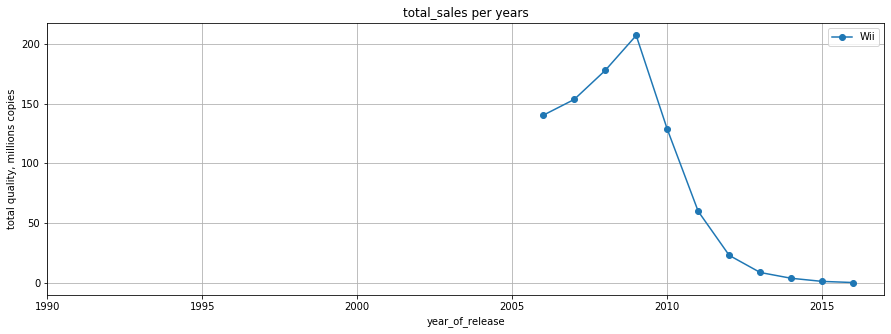

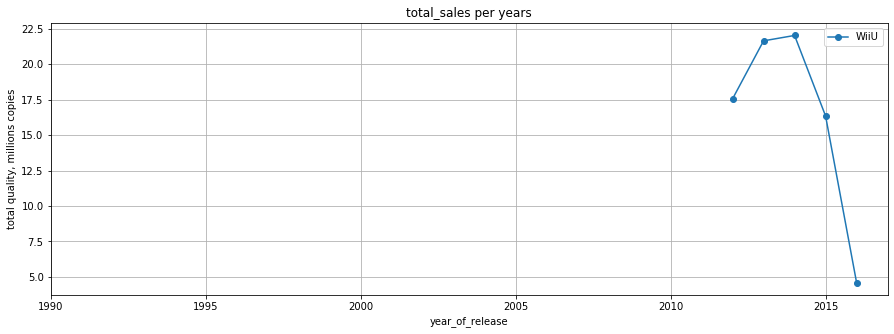

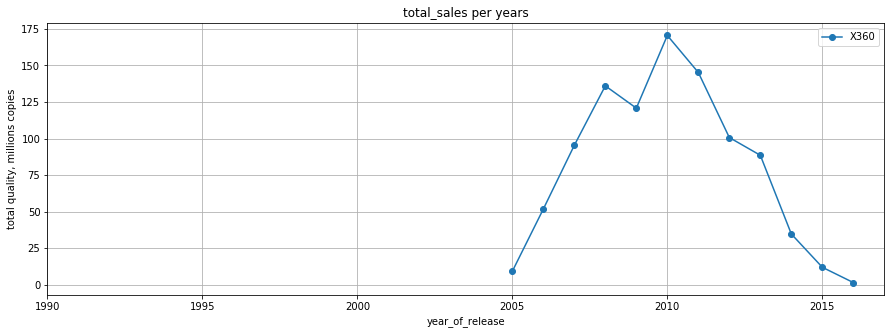

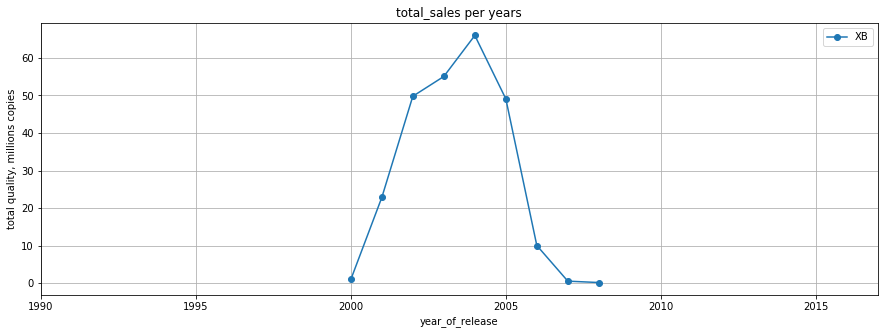

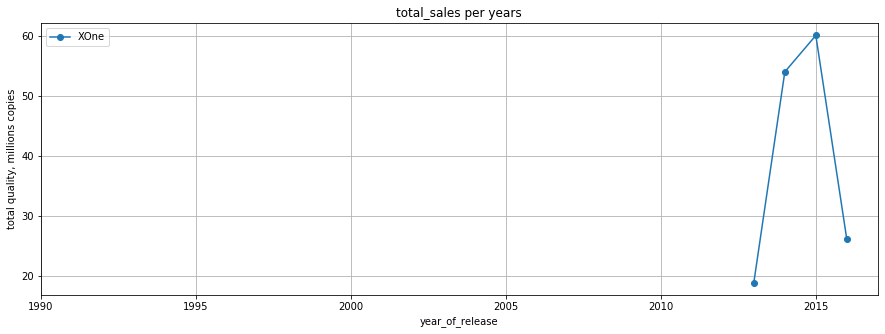

In [36]:
for i in df_game_platform_total_sales.columns:
    if df_game_platform_total_sales[i].dropna().index[0] > 1990:
        a = df_game_platform_total_sales[i].dropna().reset_index()
        a.plot(x='year_of_release', y=i, grid=True, figsize=[15,5], marker='o', xlim=[1990,2017])
        plt.title(label='total_sales per years')
        plt.ylabel('total quality, millions copies')                                                                 
        plt.show()

Как видно из полученных графиков, за исключеним отдельных случаев (когда платформа просуществовала 1-2 года), цикл существования платформы имеет волнообразный характер, довольно часто на кривых продаж можно встретить полупики: когда до или после основного пика продажи за текущий год превышают объемы продаж за предыдущий.

Определим платформы, которые получили наибольший успех исходя из объема проданных для них игр. Рассчитаем суммарные продажи за весь предоставленный период исследования.

In [37]:
df_game_platform_full_sales = df.pivot_table(index ='platform', values = 'total_sales', aggfunc='sum')
df_game_platform_full_sales.sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS2,1245.96
X360,966.61
PS3,934.71
Wii,903.31
DS,804.28
PS,727.58
PS4,314.14
GBA,313.73
PSP,292.77


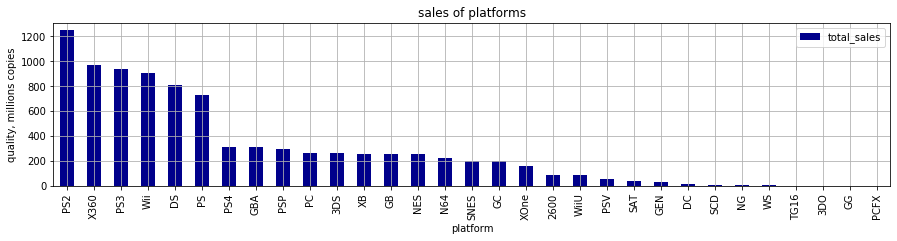

In [38]:
df_game_platform_full_sales.sort_values(by='total_sales',ascending=False).plot(kind='bar', grid=True, color = 'darkblue', figsize=[15,3])
plt.title(label='sales of platforms')
plt.ylabel('quality, millions copies')
plt.legend(loc='upper right')
plt.show()

In [39]:
median_sales_pltfrm = df_game_platform_full_sales.median() # медиана обема продаж за все время для раздичных игровых платформ
median_sales_pltfrm

total_sales    200.04
dtype: float64

Самой популярной платформой в исследуемом массиве данных является Play Station2 c показателем более чем 1,2 миллиарда проданных копий игр, но в настоящее время она перестала существовать. Из столбчатого графика и подсчета медианного значения объема продаж за исследуемый период можно заключить, что платформа попала в успешную половину с большим объемом продаж, если этот объем больше медианного значения. Следует также отметить, что в данных представленны платформы, которые на момент получения данных еще существовали и поддерживалиль - поэтому данные по ним могут быть неполными, не смотря на то, что суммарный объем продаж меньше медианного значения

In [40]:
most_pop_sales_pltfrm = df_game_platform_full_sales.query('total_sales > @median_sales_pltfrm[0]')
most_pop_sales_pltfrm

,total_sales
platform,
3DS,258.51
DS,804.28
GB,254.43
GBA,313.73
N64,218.48
NES,251.05
PC,258.51
PS,727.58
PS2,1245.96


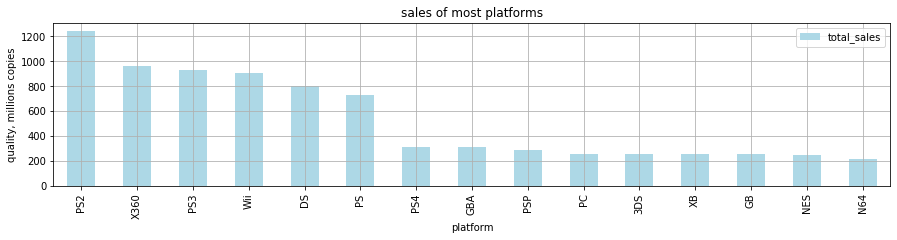

In [41]:
most_pop_sales_pltfrm.sort_values(by='total_sales',ascending=False).plot(kind='bar', grid=True, color = 'lightblue', figsize=[15,3])
plt.title(label='sales of most platforms')
plt.ylabel('quality, millions copies')
plt.legend(loc='upper right')
plt.show()

In [42]:
len(most_pop_sales_pltfrm) 
#количество платформ с объемом продаж более медианного от всего исследуемого объема данных (более 200,4)

15

In [43]:
most_pop_sales_pltfrm_list = most_pop_sales_pltfrm.index.to_list()
most_pop_sales_pltfrm_list #список самых популярных платформ

['3DS',
 'DS',
 'GB',
 'GBA',
 'N64',
 'NES',
 'PC',
 'PS',
 'PS2',
 'PS3',
 'PS4',
 'PSP',
 'Wii',
 'X360',
 'XB']

Проверим, отсутсвую ли в пердставленном списке платформы которые имели продажи в 2016 году, но суммарный объем продаж которых меньше медианного (неполные данные).

In [44]:
df_game_platform_total_sales.reset_index().query('year_of_release == 2016')

platform,year_of_release,2600,3DO,3DS,DC,DS,GB,GBA,GC,GEN,...,SAT,SCD,SNES,TG16,WS,Wii,WiiU,X360,XB,XOne
36,2016,NaN,NaN,15.14,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.18,4.6,1.52,NaN,26.15


In [45]:
df.loc[df['year_of_release']==2016].groupby('platform')['total_sales'].sum()

platform
3DS     15.14
PC       5.25
PS3      3.60
PS4     69.25
PSV      4.25
Wii      0.18
WiiU     4.60
X360     1.52
XOne    26.15
Name: total_sales, dtype: float64

Cравнительный анализ данных показывает, что только платформа "XBox One",среди продаваемыех в 2016 году не достигла отметки медианного значения за все время продаж, что объяснимо началами ее продаж в 2013 году.

### Определение актуального периода исследования

Для определения актуального периода исследования определим среднее время цикла существования платформы - этот срок мы можем использовать для последующего анализа данных и построения прогонозов. В него от текущей даты могут попасть и платформы которые завершают свое существование, и те, которые находятся на пике продаж, и платформы которые, только начинают свой "жизненный" цикл.


Для определения среднего периода существования платформы возьмем платформы появившиеся после 1990 года.

In [46]:
#получение списка платформ, появившихся после 1990 года
games_after_1990 = []
for i in df_game_platform_total_sales.columns:
    if df_game_platform_total_sales[i].dropna().index[0] > 1990:
        games_after_1990.append(i)
print(games_after_1990)

['3DO', '3DS', 'DC', 'GBA', 'GC', 'GG', 'N64', 'NG', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP', 'PSV', 'SAT', 'SCD', 'TG16', 'WS', 'Wii', 'WiiU', 'X360', 'XB', 'XOne']


In [47]:
#получени таблицы, содержащей только самые популярные платформы
df_pltfrm_after_1990 = df.query('platform in @games_after_1990').reset_index(drop=True)
df_pltfrm_after_1990

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
2,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
3,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
4,New Super Mario Bros. Wii,Wii,2009,Platform,14.44,6.94,4.70,2.24,87,8.4,E,28.32
...,...,...,...,...,...,...,...,...,...,...,...,...
12875,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
12876,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
12877,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
12878,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Сгруппируем данные по платформам, объему продаж и годам.

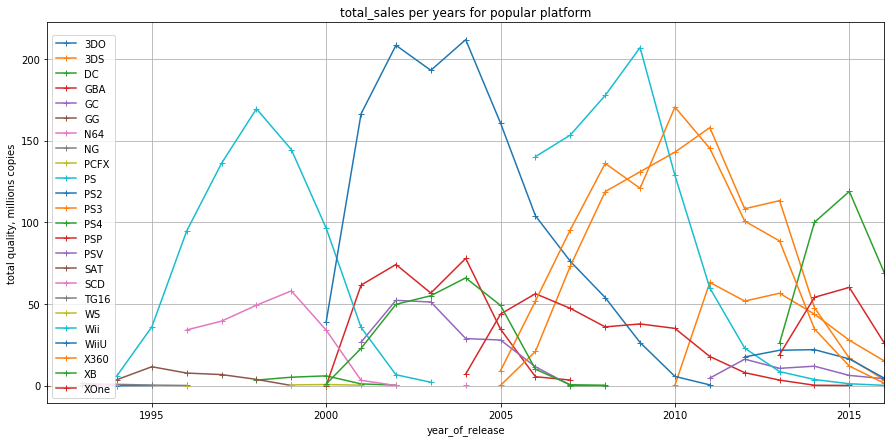

In [48]:
df_pop_pltfrm_by_years = df_pltfrm_after_1990.pivot_table(index = 'year_of_release', columns='platform', values = 'total_sales', aggfunc='sum')
df_pop_pltfrm_by_years.plot(grid=True, figsize=[15,7], marker='+')
plt.title(label='total_sales per years for popular platform')
plt.ylabel('total quality, millions copies')
plt.legend(loc='lower left')
plt.show()

In [49]:
df_pop_pltfrm_by_years 

platform,3DO,3DS,DC,GBA,GC,GG,N64,NG,PCFX,PS,...,PSV,SAT,SCD,TG16,WS,Wii,WiiU,X360,XB,XOne
year_of_release,,,,,,,,,,,,,,,,,,,,,
1992,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.21,NaN,NaN,...,NaN,NaN,1.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,0.02,NaN,NaN,NaN,NaN,NaN,NaN,0.80,NaN,6.03,...,NaN,3.65,0.36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995,0.08,NaN,NaN,NaN,NaN,NaN,NaN,0.33,NaN,35.96,...,NaN,11.57,NaN,0.16,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,NaN,NaN,NaN,NaN,34.10,0.10,0.03,94.70,...,NaN,7.69,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,NaN,NaN,NaN,NaN,39.50,NaN,NaN,136.17,...,NaN,6.77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,3.38,NaN,NaN,NaN,49.24,NaN,NaN,169.49,...,NaN,3.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,5.16,NaN,NaN,NaN,58.01,NaN,NaN,144.53,...,NaN,0.09,NaN,NaN,0.46,NaN,NaN,NaN,NaN,NaN
2000,NaN,NaN,5.99,0.07,NaN,NaN,33.97,NaN,NaN,96.37,...,NaN,NaN,NaN,NaN,0.68,NaN,NaN,NaN,0.99,NaN


Для получения среднего времени существования платформы получим число уникальных значений объема продаж по годам для каждой платформы и посчитаем их среднее и медиану.

In [50]:
exist_time_pltfrm_median = df_pop_pltfrm_by_years.nunique().median() # среднее время "жизненного" цикла платформы
exist_time_pltfrm_mean = df_pop_pltfrm_by_years.nunique().mean()# медианное время "жизненного" цикла платформы
display('exist_time_pltfrm_median:', exist_time_pltfrm_median)
display('exist_time_pltfrm_mean:', exist_time_pltfrm_mean)

'exist_time_pltfrm_median:'

6.5

'exist_time_pltfrm_mean:'

6.416666666666667

Из полученных данных видно, что в среднее и медианное **время жизни** самых популярных **платформ** достаточно идентичны и составляют около **6,5 лет**.

**Выберем в качестве периода исследования** **значение - 3 года** относительно последнего года в пердосталенных данных - это примерно половина "жизненного" цикла

In [51]:
actual_period = 3 #значение актуального периода исследования

### Исследование продаж игр на актуальном периоде

Отсортируем таблицу с самыми популярными платформами по актуальному периоду.

In [52]:
#получени таблицы, содержащей только популярные по 1990 г. платформы за послеедние три года
df_clear = df.query('(platform in @games_after_1990 or platform=="PC") and year_of_release >= (year_of_release.max() - @actual_period+1)').reset_index(drop=True)

In [53]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689 entries, 0 to 1688
Data columns (total 12 columns):
name               1689 non-null object
platform           1689 non-null object
year_of_release    1689 non-null Int64
genre              1689 non-null object
na_sales           1689 non-null float64
eu_sales           1689 non-null float64
jp_sales           1689 non-null float64
other_sales        1689 non-null float64
critic_score       718 non-null Int64
user_score         888 non-null float64
rating             940 non-null object
total_sales        1689 non-null float64
dtypes: Int64(2), float64(6), object(4)
memory usage: 161.8+ KB


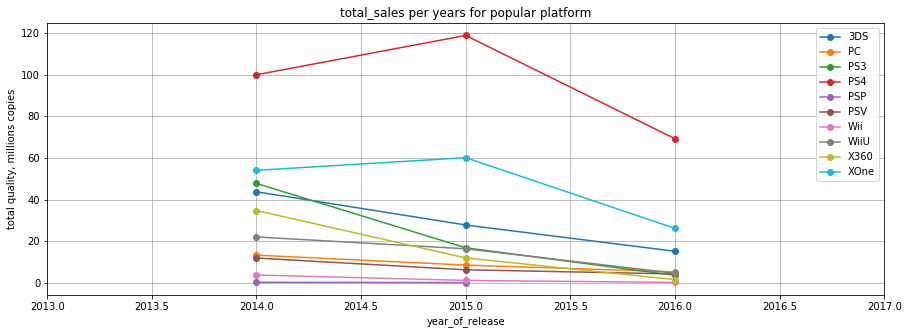

In [54]:
#группировка отсортированной таблицы по платформам и годам и построение динамики общих продаж
df_clear_pltfrm_by_years = df_clear.pivot_table(index = 'year_of_release', columns='platform', values = 'total_sales', aggfunc='sum')
df_clear_pltfrm_by_years.plot(grid=True, figsize=[15,5], marker='o', xlim =[2013,2017])
plt.title(label='total_sales per years for popular platform')
plt.ylabel('total quality, millions copies')
plt.legend(loc='upper right')
plt.show()

Из полученных данных видно, что на момент последнего описанного в таблице года часть платформ завершило существование ("GBA"(2007),"XBox"(2008), "Play Station2"(2011), "Nintendo DS" (2013)), многие подходят к концу своего предполагаемого "жизненного" цикла - они прошли пик продаж и к 2016 году их продажи заметно упали. Но некоторые платформы относительно недавно появились ("Nintendo 3DS" (2010), "Play Station4"(2013), "XBox One"(2013)). Отдельно следует упомянуть платформу "PC" -персональный компьютер, вероятно время сущетсвование данной платформы не входит в рамки принятых значений.

In [55]:
#вывод значений продаж за последние два года
df_clear_pltfrm_by_2015_2016 = df_clear_pltfrm_by_years.query('year_of_release == 2016 or year_of_release == 2015')
df_clear_pltfrm_by_2015_2016


platform,3DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2015,27.78,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


Лидерами продаж на 2016 год являются платформы "Play Station4" и "XBox One", а платформа "Nintendo Wii" имеет минимальную выручку и возможно закончит свое существование уже в ближайшее время. 

Из графиков видно что значения продаж по всем платформам упали, однако среди перспективных следует выделить платформы "Play Station4" и "XBox One" они еще не дошли до середины предполагаемого жизненного цикла.

**Исследуем суммарные показатели продаж по платформам на рассматриваемом периоде**

Сгруппируем полученные данные по платформам и получим сумму продаж за весь период.

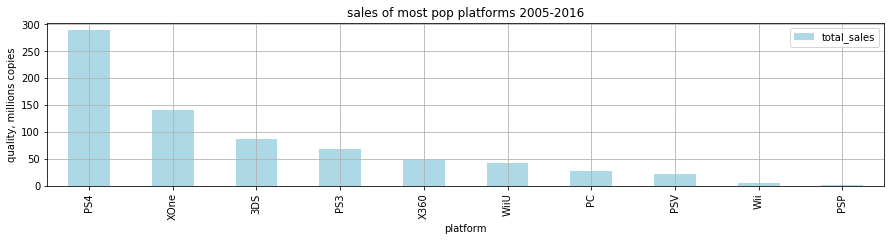

In [56]:
#группировка отсортированной таблицы по платформам и годам и определение сумм общих продаж
df_clear_all_sales = df_clear.pivot_table(index = 'platform', values = 'total_sales', aggfunc='sum')
df_clear_all_sales.sort_values(by='total_sales', ascending=False).plot(kind='bar', grid=True, color = 'lightblue', figsize=[15,3])
plt.title(label='sales of most pop platforms 2005-2016')
plt.ylabel('quality, millions copies')
plt.legend(loc='upper right')
plt.show()

In [57]:
#таблица суммарных продаж по платформам
df_clear_all_sales.sort_values(by = 'total_sales', ascending = False)

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


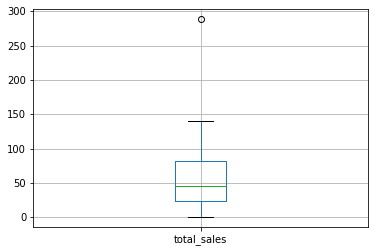

In [58]:
df_clear_all_sales.boxplot() #диаграмма размаха по суммарным продажам платформ

In [59]:
df_clear_all_sales.describe()

,total_sales
count,10.000000
mean,72.945000
std,86.355404
min,0.360000
25%,23.562500
50%,45.600000
75%,82.055000
max,288.150000


Из диаграммы размаха и параметров описательных статистик можно сделать следующее заключение:
 - медианное значение объема продаж - примерно 45,6 млн. копий;
 - среднее значение примерно 72,95 млн. копий, что обусловленно наличием нескольких сверхпопулярных платформ;
 - максимальное значение объема продаж - 288,15 млн. копий
 - минимальное значение объема продаж - 0,36 млн. копий
 - выбросы отсуствуют;
 - значение первого квартиля - 23,56 млн. копий;
 - значение третьего квартиля - 82,06 млн. копий.

Попстроим диаграммы размаха продаж игр за исследуемый актуальный период в три года для каждой из исследуемых игровых платформ.

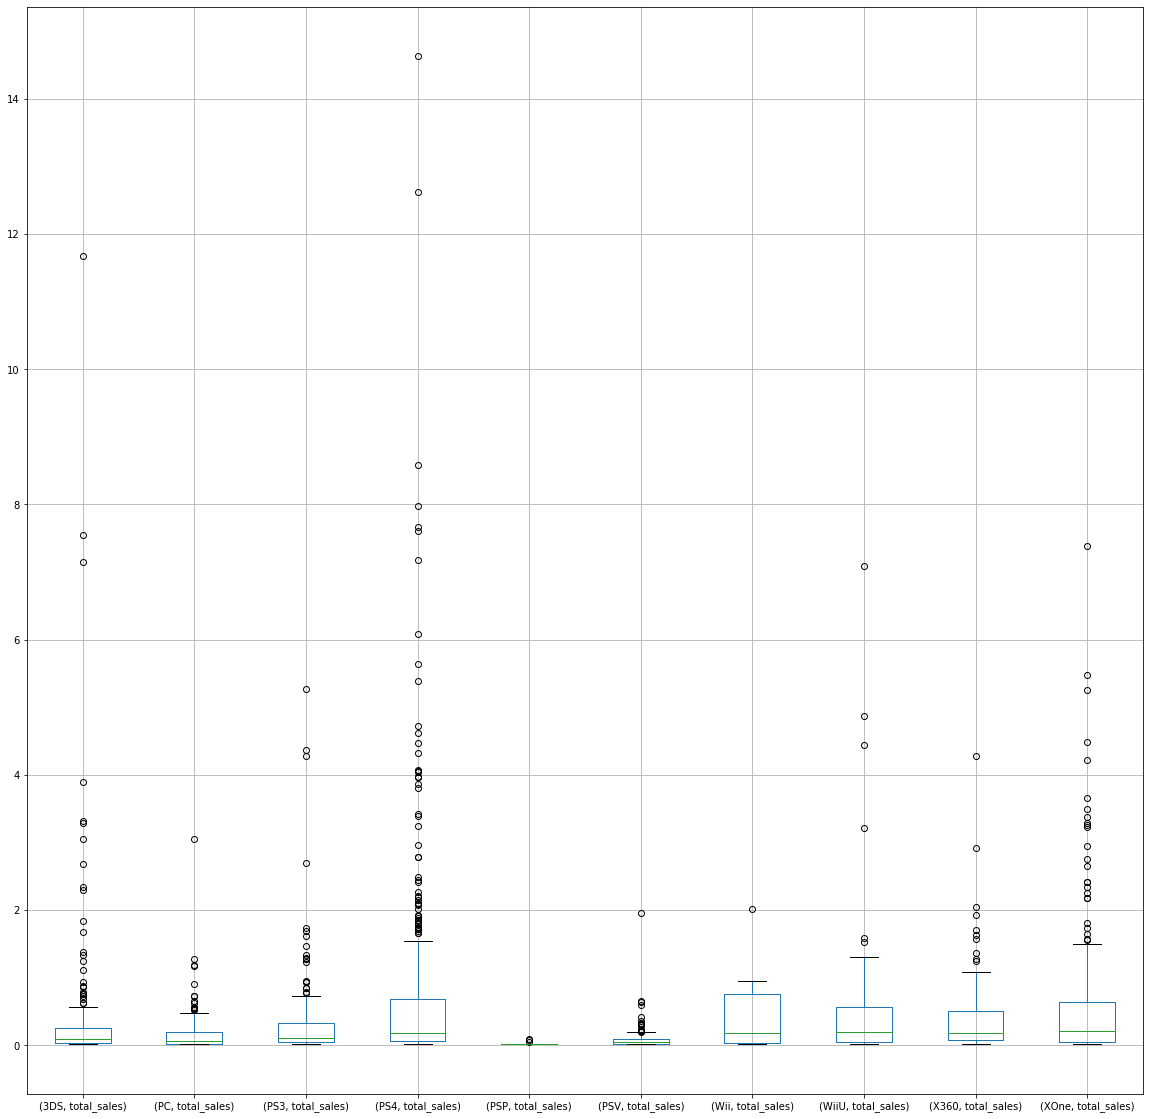

In [60]:
df_clear[['platform','total_sales']].groupby('platform').boxplot(['platform'],grid = True, figsize =(20, 20))

In [61]:
df_clear.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,212.0,0.408868,1.188368,0.01,0.0300,0.090,0.2500,11.68
PC,151.0,0.179139,0.329359,0.01,0.0200,0.060,0.2000,3.05
PS3,219.0,0.311324,0.633059,0.01,0.0400,0.110,0.3250,5.27
PS4,376.0,0.766356,1.614969,0.01,0.0575,0.185,0.6900,14.63
PSP,13.0,0.027692,0.027735,0.01,0.0100,0.020,0.0200,0.09
PSV,295.0,0.075932,0.141591,0.01,0.0200,0.040,0.0900,1.96
Wii,11.0,0.460909,0.625451,0.01,0.0350,0.180,0.7550,2.01
WiiU,73.0,0.588767,1.161467,0.01,0.0500,0.190,0.5700,7.09
X360,111.0,0.434414,0.628967,0.01,0.0700,0.180,0.5050,4.28


Как видно из диаграммы размаха и описательных статистик: параметры продаж отдельных игр (квартильные значения, среднее) в течении года для исследуемого периода лежат в достаточно узких пределах для всего спектра представленных платформ. Существую отдельные выбросы, вероятно, обусловленные успехом отдельных игр. 
Продажи игр для портативных платформ имеюют чуть меньшие объемы, среди же популярных платформ стоит отметить PS4, Wii, XOne.

### Исследование влияния оценок критиков и пользователей на продажи

Создадим функцию для вывода диаграмм рассеяния и подсчета коэффициента корреляции объемов продаж и оценок критиков и пользователей.

In [62]:
def score_to_sale_impact_critic_score(a):
    df_clear_row = df_clear.query('platform == @a')
    plt.figure(figsize=(15,4))
    plt.scatter(x=df_clear_row['critic_score'], y=df_clear_row['total_sales'], alpha=0.3,  label='critic_score '+a)
    plt.legend(loc='upper right')
    plt.title('scattering diagram '+a)
    plt.grid()
    plt.xlabel('score')
    plt.ylabel('value_sales')
    plt.show()
    critic_corr = df_clear_row['critic_score'].astype(float).corr(df_clear_row['total_sales'])
    print('critic_corr '+a+':', critic_corr)

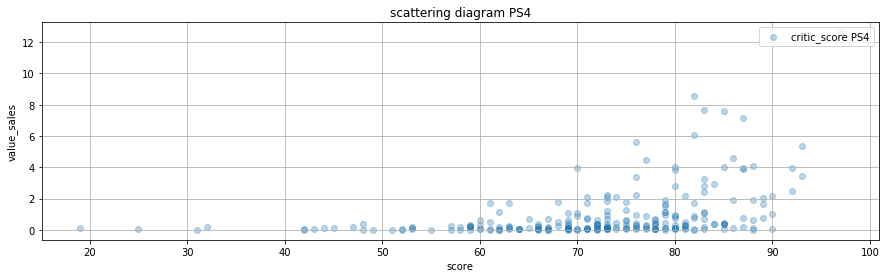

critic_corr PS4: 0.40266141068104117


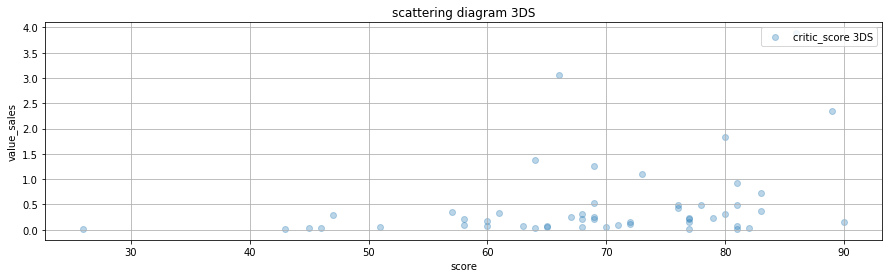

critic_corr 3DS: 0.31411749286905094


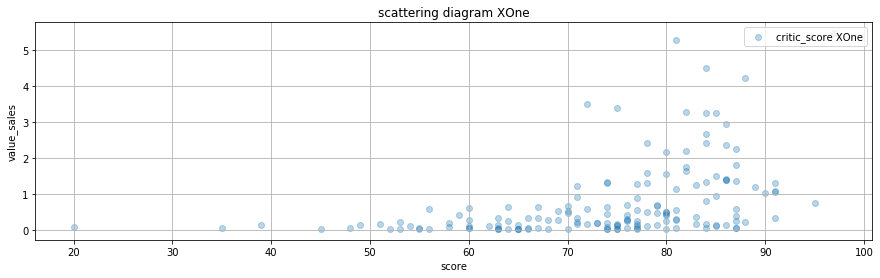

critic_corr XOne: 0.428676943703332


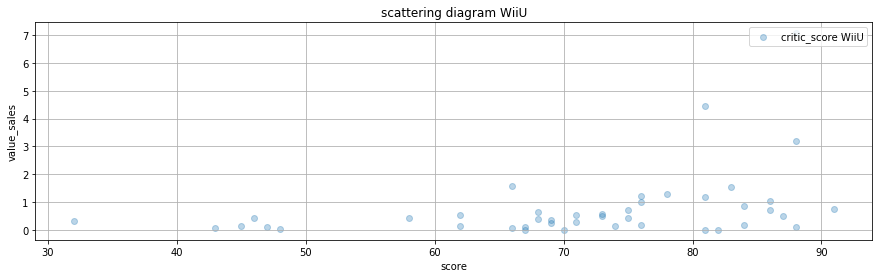

critic_corr WiiU: 0.3702014124808841


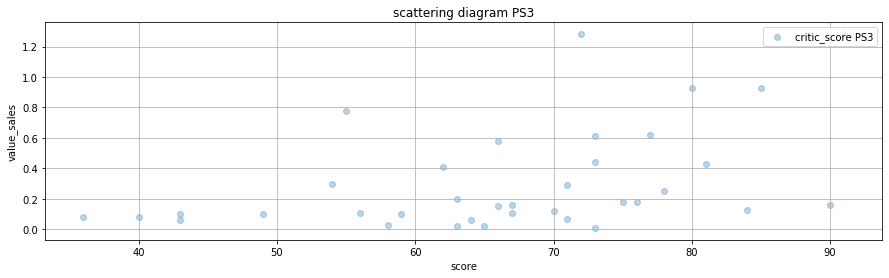

critic_corr PS3: 0.44657460493190715


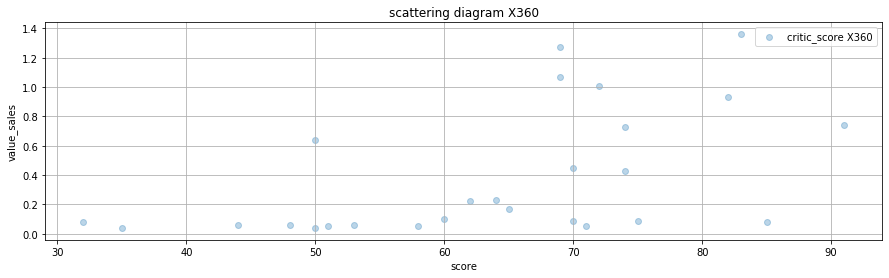

critic_corr X360: 0.5257228356581521


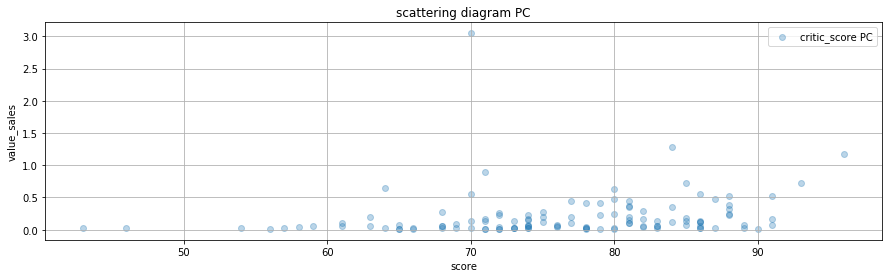

critic_corr PC: 0.1746341376935003


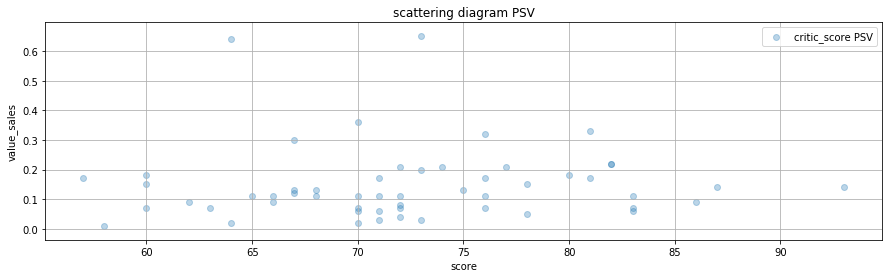

critic_corr PSV: 0.042664906570095286


In [63]:
for i in df_clear['platform'].unique():
    if i=='Wii' or i=='PSP':
        continue
    else:
        score_to_sale_impact_critic_score(i)

In [64]:
def score_to_sale_impact_user_score(a):
    df_clear_row = df_clear.query('platform == @a')
    plt.figure(figsize=(15,4))
    plt.scatter(x=df_clear_row['user_score'], y=df_clear_row['total_sales'], alpha=0.3,  label='user_score '+a) 
    plt.legend(loc='upper right')
    plt.grid()
    plt.title('scattering diagram '+a)
    plt.xlabel('score')
    plt.ylabel('value_sales')
    plt.show()
    user_corr = df_clear_row['user_score'].corr(df_clear_row['total_sales'])
    print('critic_corr '+a+':', user_corr)

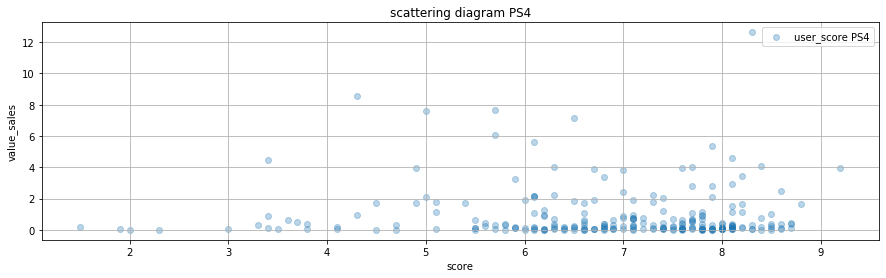

critic_corr PS4: -0.040131589472697266


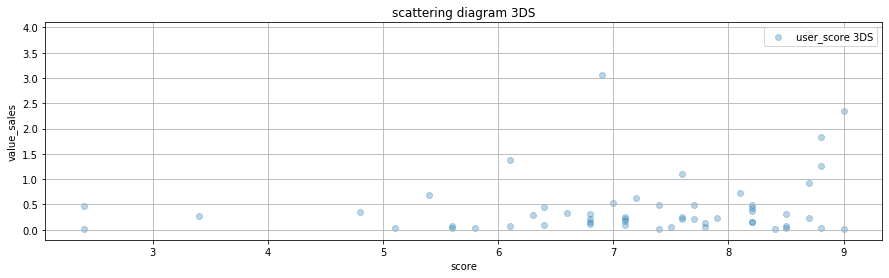

critic_corr 3DS: 0.21519327185270273


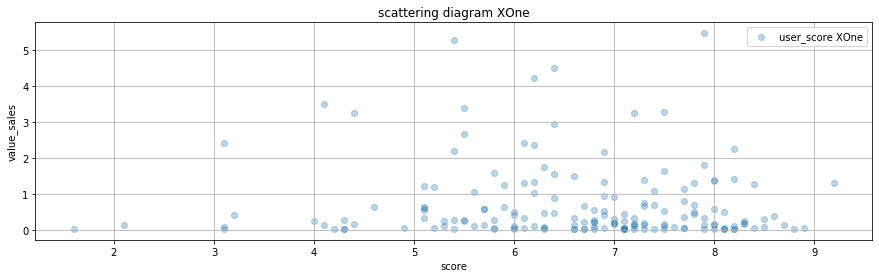

critic_corr XOne: -0.0703839280647581


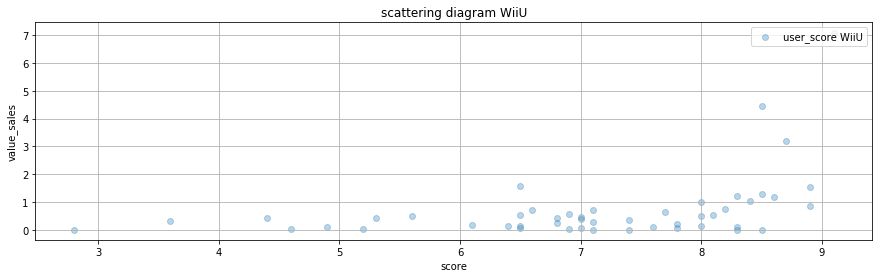

critic_corr WiiU: 0.40792645792170795


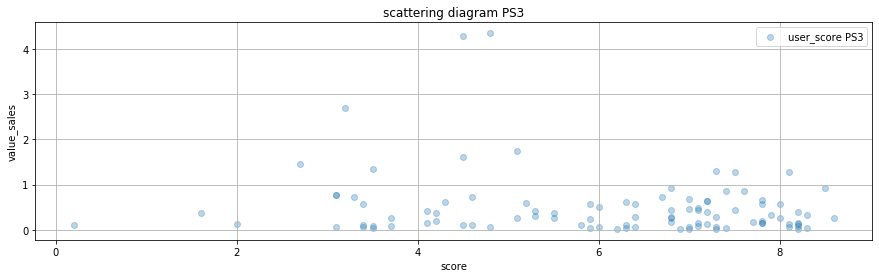

critic_corr PS3: -0.166761413476621


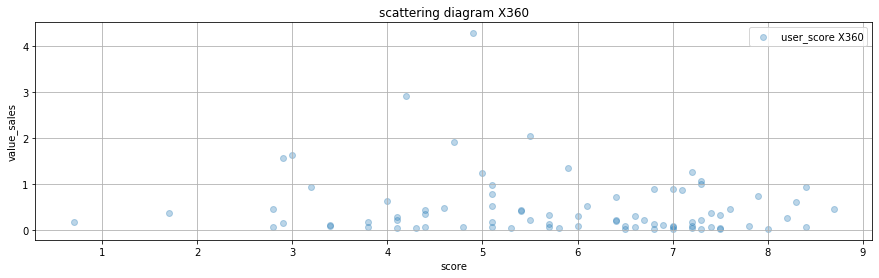

critic_corr X360: -0.13844457094566506


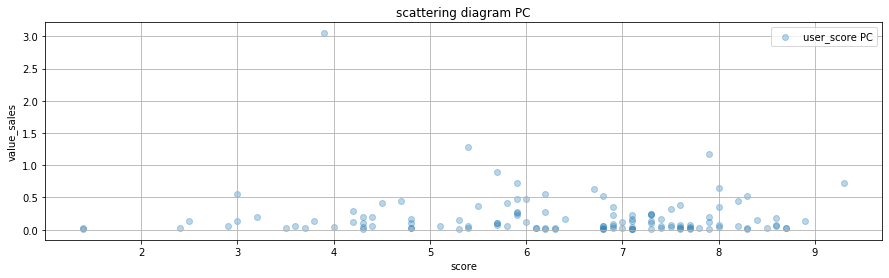

critic_corr PC: -0.07159665703472451


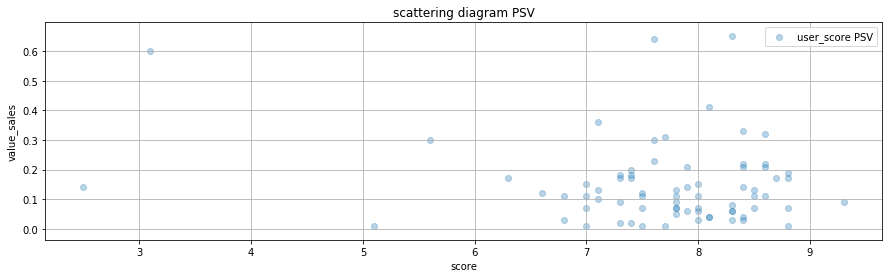

critic_corr PSV: -0.1684550497806444


In [65]:
for i in df_clear['platform'].unique():
    if i=='Wii' or i=='PSP': # исключение - малое количество оценок
        continue
    else:
        score_to_sale_impact_user_score(i)

Создадим таблицу коэффициентов корреляции оценок критиков и пользователей и суммарных продаж.

In [66]:
platform_name = [] #расчет значений корреляции для уникальных имен игровых платформ
critic_corr_column = []
user_corr_column = []
for k in df_clear['platform'].unique():
    df_corr = df_clear.query('platform == @k')
    critic_corr = df_corr['critic_score'].astype(float).corr(df_corr['total_sales'])
    user_corr = df_corr['user_score'].corr(df_corr['total_sales'])
    platform_name.append(k)
    critic_corr_column.append(critic_corr)
    user_corr_column.append(user_corr)


In [67]:
# создание таблицы с коэффициентами корреляции
data = {'platform_name': platform_name , 'critic_corr_column': critic_corr_column, 'user_sc_corr_sales': user_corr_column}
df_corr_score_sales = pd.DataFrame(data)
df_corr_score_sales

,platform_name,critic_corr_column,user_sc_corr_sales
0,PS4,0.402661,-0.040132
1,3DS,0.314117,0.215193
2,XOne,0.428677,-0.070384
3,WiiU,0.370201,0.407926
4,PS3,0.446575,-0.166761
5,X360,0.525723,-0.138445
6,PC,0.174634,-0.071597
7,Wii,NaN,1.000000
8,PSV,0.042665,-0.168455
9,PSP,NaN,NaN


В общем случае коэффициент корреляци оценок критиков и суммарных продаж можно интерпритировать как среднюю положительную зависимость, коэффициент корреляци оценок пользователей и суммарных продаж - как слабовыраженную, положительную, так и отрицательную зависимость. Таким образом, на объем продаж болше влияют оценки критиков, нежели оценки пользователей, то есть пользователь покупает игру больше под воздействием обзоров критиков, а не отзывов обычных игроков. Для платформ 'Wii' и 'PSP' даные необъективны ввиду отсутсвия достаточного коллличества оценок.

### Исследование характеристики жанра игры

Определим самые популярные жанры игр и зависимоть продаж от них. 

In [68]:
df_genre = df_clear.pivot_table(index = 'genre', values = 'name', aggfunc='count')
df_genre.sort_values(by = 'name', ascending = False)

,name
genre,
Action,619
Role-Playing,221
Adventure,185
Sports,161
Shooter,128
Misc,113
Racing,69
Fighting,60
Simulation,44


Самым распространенным жанром стал "Action" . Самые непопулярныq жанр - "Puzzle". 

Проанализируем, как полученный данные о выпуске игр в различных жанрах соотносятся реальными продажами.
Cруппируем данные по объему продаж на основе жанров, и найдем средний объем продаж.

In [69]:
df_genre_sales = df_clear.pivot_table(index = 'genre', values = 'total_sales', aggfunc='mean')
df_genre_sales.sort_values(by = 'total_sales', ascending = False)

,total_sales
genre,
Shooter,1.335469
Sports,0.680000
Platform,0.476053
Fighting,0.470333
Role-Playing,0.459005
Racing,0.398841
Misc,0.332301
Action,0.322068
Simulation,0.298409


В целом средние объемы продаж с небольшой разницей соответсвуют распространенности игр. 

### Вывод

В ходе исследовательского анализа данных выполнены:
- Исследование динамики объемов выпущенных игр: установлено, что развитие индустрии компьтерных игр надалось в 1990-х годах, пик разноабразия выпущенных игр пришелся на 2008-2009 г, далее объемы выпуска снижались ввиду изменения технологий и появления новых форматов распотранения игр и их монетезации.
- Исследование динамики объемов продаж по игровым платформам: установленны (по объему продпж за время существования платформы) самые популярные игровые платформы (Play Station2, XBox360, Play Station3 в порядке убывания). Для дальнейших исследований выделены наиболее популярные платформы с объемом продаж выше медианного значения по всем платформам.
- Определение актуального периода исследования: на основании данных о популярных с 1990 г. платформах определен примерный временной отрезок существования платформы (6,5 лет),
- В качестве актуального периода принят период в 3 года.
- Исследование продаж игр на актуальном периоде: определены парметры успешности платформ на основе данных об объемах продаж, для актуального периода исследования определены перспективные на последний год предсталенных данных платформы: "Play Station4" и "XBox One". Определены лидеры продаж, и платформы, котоые с большой вероятносью закончат существование в скором времени.
- Исследование влияния оценок критиков и пользователей на продажи: установленно, что в большей степени покупка игр зависит от оценки критиков (слабовыраженная положительная связь), а не от отзывов игроков (маловыраженная положитльная и отрицательные связи), однако существуют платформы, для которых оценки критиков и пользователей в принципе не оказывают большого влияния на решение о покупке игры.
- Исследование характеристики жанра игры: установлены самые популярные ("Shooter", "Sport", "Role-Playing") и непопулярные жанры, можно заключить, что жанр игры - один из критериев, влияющих на объем ее продаж. 

## Исследование региональных продаж

Для исследования продаж по регионам создадим функцию, принимающую в качестве агрумента исследуемый показатель, из отфильтрованной таблицы df_clear, и выводящей отсортированную по возрастанию сводную таблицу (первую пятурку лидеров) по иследуемым показателям и рынкам в процентном соотношении к общим продажам на конкретном рынке.

In [70]:
def region_sales(a): #создание функции исследования региональных продаж
    df_factor_na = df_clear.pivot_table(index = a, values = 'na_sales', aggfunc='sum')/df_clear['na_sales'].sum()*100
    display(df_factor_na.sort_values(by='na_sales', ascending = False).head().round(2).astype(str) + '%')
    df_factor_eu = df_clear.pivot_table(index = a, values = 'eu_sales', aggfunc='sum')/df_clear['eu_sales'].sum()*100
    display(df_factor_eu.sort_values(by='eu_sales', ascending = False).head().round(2).astype(str) + '%')
    df_factor_jp = df_clear.pivot_table(index = a, values = 'jp_sales', aggfunc='sum')/df_clear['jp_sales'].sum()*100
    display(df_factor_jp.sort_values(by='jp_sales', ascending = False).head().round(2).astype(str) + '%')

### Исследование по критерию популятности платформ.

In [71]:
region_sales('platform')

,na_sales
platform,
PS4,34.71%
XOne,28.61%
X360,9.96%
3DS,7.97%
PS3,7.76%


,eu_sales
platform,
PS4,48.04%
XOne,17.09%
PS3,9.44%
PC,6.64%
3DS,5.96%


,jp_sales
platform,
3DS,47.52%
PS4,16.13%
PSV,15.62%
PS3,12.05%
WiiU,7.85%


Анализ популярности игровых платформ первой пятерки по числу продаж на различных рынках показывает, что для рынков Северной Америки и Евросоюза характерен примерно одинаковый набор популярных платформ , за исключением небольших отличий. В список же самых популярных 5 платформ рынка Японии попали две портативные платформы , то есть для японцев характерен процесс игры, не зависящий от месторасположения. Они играют в любом удобном месте.

### Исследование по критерию популятности игровых жанров.

In [72]:
region_sales('genre')

,na_sales
genre,
Shooter,27.82%
Action,25.53%
Sports,16.24%
Role-Playing,11.78%
Misc,5.3%


,eu_sales
genre,
Action,27.59%
Shooter,24.21%
Sports,16.89%
Role-Playing,10.41%
Racing,5.22%


,jp_sales
genre,
Role-Playing,33.47%
Action,31.78%
Fighting,6.84%
Misc,6.03%
Shooter,5.23%


Анализ популярности игровых жанров также показывает, что вкусовые предпочтения североамериканцев и европейцев очень близки: первые четыре позиции абсолютно идентичны, в том числе по месту рейтинга числа продаж и их доле, и только на пятом месте для Северной Америки предподчтительнее ролевые игры, а у Европы - гонки. Рынок же Японии имеет достаточно серьезные отличия: да, как и в Северной Америки и в Европе, в Японии в первой пятерки находятся жанры "Action", "Misc", "Sport", но на первом месте у японцев  "Role-Playing" - ролевые игры, жанр "Shooter" замыкает пятерку лидеров жанров с большим отставанием от первой и второй позиций рейтинга.

### Исследование по критерию рейтингa ESRB.

Следует отметить, что для возрастного рейтинга в исследуемой таблице присутсвует более 3000 пропущенных значний при полном наличии данных о продажах на рынках, поэтому доля продаж игр с конкретным рейтингом рассчитывается с учетом всех продаж, в том числе для тех, рейтинг которых недоступен.

In [73]:
region_sales('rating')

,na_sales
rating,
M,33.94%
E,17.86%
T,13.71%
E10+,11.7%


,eu_sales
rating,
M,34.52%
E,21.45%
T,12.59%
E10+,9.66%


,jp_sales
rating,
T,15.88%
E,9.6%
M,8.6%
E10+,4.79%


Entertainment Software Rating Board (ESRB) — негосударственная организация, основное направление деятельности которой принятие и определение рейтингов для компьютерных видеоигр и другого развлекательного программного обеспечения. Стандартными значениями рейтинга являются:
- «EC» («Early childhood») — «Для детей младшего возраста»;
- «E» («Everyone») — «Для всех» (от 6 лет);
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше» (от 10 лет);
- «T» («Teen») — «Подросткам» (от 13 лет);
- «M» («Mature») — «Для взрослых» (от 17 лет);
- «AO» («Adults Only 18+») — «Только для взрослых» (строго от 18 лет);
- «RP» («Rating Pending») — «Рейтинг ожидается» (аналог отсутсвия данных о возрастном цензе).

Ситуация с возрастными рейтингами для Северной Америки и Европы - также практически идентичны: на первом месте игры с рейтингом "Е" - игры для всех, далее игры для взрослых "M" - это примерно две трети от первой строчки рейтинга, далее игры - для тинейджеров ("Т") и детей от 10 лет ("Е10+").  Для японского рынка харатерны те же популярные возрастные рейтинги, но распределение их отличается. Игры для взрослых ("М") распространены в 3 раза меньше, чем первая строчка рейтинга ("E" - игры для всех). Все рейтинги умещаются в 4 категории, и абсолютно отсутсвуют игры с маркировкой "АО" (строго для взрослых). Анализ ситуации показывате, что большинство пользователей рынка Японии это дети и подростки, доля игр с маркировкой для взрослых в Японии сооставляетм менее 10% от продаж, в то время, как в северной Амереке и Евросоюзе доходит почти до 25%.  

### Вывод

Анализ различных региональных рынков компьютерных игр позволяет составить примерный "портрет" пользователей: пользователи Северной Америки и Евросоюза достаточно похожи - это дети, подростки и в четверти случаев взрослые люди, предпочитающие стационарные игровые платформы("XBox360", "Play Station3". "Nintendo Wii") и динимачные жанры игр("Action", "Sport", "Shooter"); пользователи Японии имеют серьезные отличия - это в основном  дети и подростки (и только в 1/10 случаев взрослые люди), предпочитающие мобильные игровые платформы("Nintendo DS", "Nintendo 3DS". "Play Saton Portable"), также любящие динимачные жанры игр("Action", "Sport") исключая "стрелялки" ("Shooter"), но больше всего предпочитающие ролевые игры "Role-Playing".

Вероятно, такие отличия связаны с особенностями культуры и воспитания. Все таки Новый и Старый Свет обладают большой культурной идентичностью, а Япония - это совершенно иная страна, с другим укладом жизни и ценностями. Все это накладывает отпечатки и на структуру продаж компьютерных игр.

## Проверка гипотез о рейтингах игровых платформ и жанров

Сформулируем и проверим две гипотезы о рейтингах для игровых платформ и жанров:
1. Средние пользовательские рейтинги платформ "XBox One" и "PC" одинаковые;
2. Средние пользовательские рейтинги жанров "Action" (англ. «действие», экшен-игры) и "Sports" (англ. «спортивные соревнования») разные.

Для предварительного ознакомления со статистическими характеристиками сравниваемых выборок, создадим функцию, принимающую в качестве аргументов значение двух сравниваемых выборок и их названия и выводящую результаты расчета описательных характеристик, дисперсию и диаграмму разброса.

In [74]:
def loc_metrics(first_selection, second_selection, first_selection_name, second_selection_name):
    dscrb_first_selection = first_selection.describe() #блок вычисления описательных статистик
    dscrb_second_selection = second_selection.describe()
    variance_first_selection = np.var(first_selection, ddof=1)#блок вычисления димперсии
    variance_second_selection = np.var(second_selection, ddof=1)
    data = pd.DataFrame({'value_name':['count', 'mean', 'std', 'variance', 'min', #создание таблицы результатов
                            '25%_1st_quartile', 'median_50%_2nd_quartile', '75%_3rd_quartile', 'max'],
                        first_selection_name:[dscrb_first_selection[0], dscrb_first_selection[1],
                                           dscrb_first_selection[2], variance_first_selection,
                                           dscrb_first_selection[3], dscrb_first_selection[4],
                                           dscrb_first_selection[5], dscrb_first_selection[6],
                                           dscrb_first_selection[7]],
                        second_selection_name:[dscrb_second_selection[0], dscrb_second_selection[1],
                                            dscrb_second_selection[2], variance_second_selection,
                                            dscrb_second_selection[3], dscrb_second_selection[4], 
                                            dscrb_second_selection[5], dscrb_second_selection[6],
                                            dscrb_second_selection[7]]})
    print(data)
    plt.figure(figsize=(15,6))
    sns.distplot(second_selection, kde=False, label= second_selection_name) #блок вывода графических данных
    sns.distplot(first_selection, kde=False, label= first_selection_name)
    plt.title(label='Variance histogram '+first_selection_name+' / '+second_selection_name)
    plt.grid()
    plt.ylabel("frequency")
    plt.legend(loc='upper right')
    plt.show()

### Проверка гипотезы "Средние пользовательские рейтинги платформ "XBox One" и "PC" одинаковые"

Сформулируем нулевую гипотезу H0: "Среднее значение рейтинга пользователей платформы "XBox One" равно среднему значению рейтинга пользователей платформы "PC": S_user_sc_mean_XB_One = S_user_sc_mean_PC.

Альтернативная гипотеза H1: "Среднее значение рейтинга пользователей платформы "XBox One" не равно среднему значению рейтинга пользователей платформы "PC": S_user_sc_mean_XB_One != S_user_sc_mean_PC.

Для проверки гипотезы создадим выборки по ценкам пользователей для указанных платформ на основе отсортированной таблицы с исключенеим пропущенных значений. Оценим их размер и дисперсию значений.

In [75]:
user_score_x_one = df_clear.query('platform == "XOne"')['user_score'].dropna().reset_index(drop=True)

In [76]:
user_score_pc = df_clear.query('platform == "PC"')['user_score'].dropna().reset_index(drop=True)

Используем созданную функцию для изучения параметров полученных выборок.

                value_name  user_score_pc  user_score_x_one
0                    count     122.000000        165.000000
1                     mean       6.298361          6.594545
2                      std       1.703278          1.375139
3                 variance       2.901154          1.891007
4                      min       1.400000          1.600000
5         25%_1st_quartile       5.325000          5.800000
6  median_50%_2nd_quartile       6.800000          6.800000
7         75%_3rd_quartile       7.600000          7.600000
8                      max       9.300000          9.200000


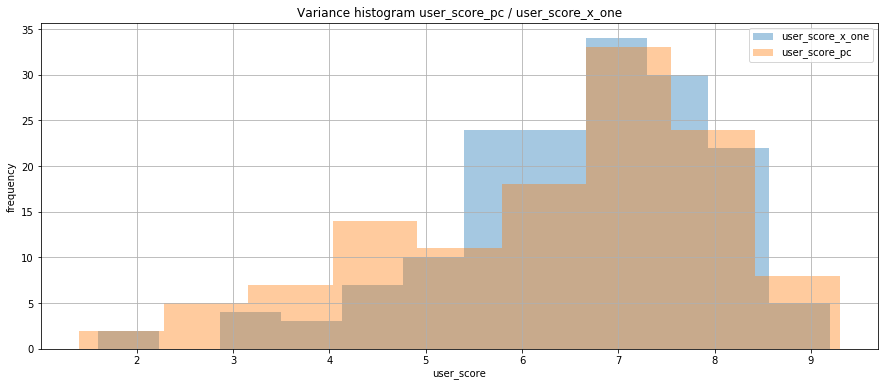

In [77]:
loc_metrics(user_score_pc, user_score_x_one, "user_score_pc", "user_score_x_one")    

Размер выборки для платформы "XBox One" - 165 значения, для "PC" - 122 значения. Дисперсия и стандартное отклонение для платформы "PC" больше. Уровни максимальных и минимальных оценок примерно равны. Распределение для платормы "XBox One" носит нормальный характер, для платформы "РС" - смещено влево (среднее меньше медианы), что свидетельcвует о достаточно значимом количестве очень низких оценок.


Будем исходить из того что выборки по разным платформам не зависят друг от друга (оценки игр на одной платформе не влияют на оценки на другой). Для подсчета вероятности равенства среднего двух генеральных совокупностей по взятым из них выборкам будем использовать метод scipy.stats.ttest_ind(). Исследуемые выборки разного размера, поэтому укажем параметр equal_var = False. Критический уровень статистической значимости определим в 5%.


In [78]:
results = st.ttest_ind(
    user_score_x_one, 
    user_score_pc)
print('p-значение: ', results.pvalue)

alpha = .05

if  results.pvalue < alpha:
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.10450507919348415


'Не получилось отвергнуть нулевую гипотезу'

Нулевая гипотеза о равенстве средних пользовательских оценок для платформ  "XBox One" и "PC" отвергнуть не получилось. Вероятность наступления события равенства средних оценок для двух выбранных платформ достаточно велика с учетом принятого уровня стстистической значимости.

### Проверка гипотезы "Средние пользовательские рейтинги жанров "Action"  и "Sports" разные".

Сформулируем нулевую гипотезу H0: "Среднее значение рейтинга пользователей жанра "Action" неравно среднему значению рейтинга пользователей жанра "Sports": S_user_sc_mean_Action != S_user_sc_mean_Sports.

Альтернативная гипотеза H1: "Среднее значение рейтинга пользователей жанра "Action" равно среднему значению рейтинга пользователей жанра "Sports": S_user_sc_mean_Action = S_user_sc_mean_Sports.

Для проверки гипотезы создадим выборки по ценкам пользователей для указанных жанров на основе отсортированной таблицы с исключением пропущенных значений. Оценим их размер и дисперсию значений.

In [79]:
user_score_action = df_clear.query('genre == "Action"')['user_score'].dropna().reset_index(drop=True)

In [80]:
user_score_sports = df_clear.query('genre == "Sports"')['user_score'].dropna().reset_index(drop=True)

                value_name  user_score_Action  user_score_Sports
0                    count         297.000000         127.000000
1                     mean           6.760606           5.225197
2                      std           1.377852           1.856604
3                 variance           1.898477           3.446979
4                      min           2.000000           0.200000
5         25%_1st_quartile           6.100000           4.000000
6  median_50%_2nd_quartile           7.100000           5.500000
7         75%_3rd_quartile           7.700000           6.650000
8                      max           9.000000           8.800000


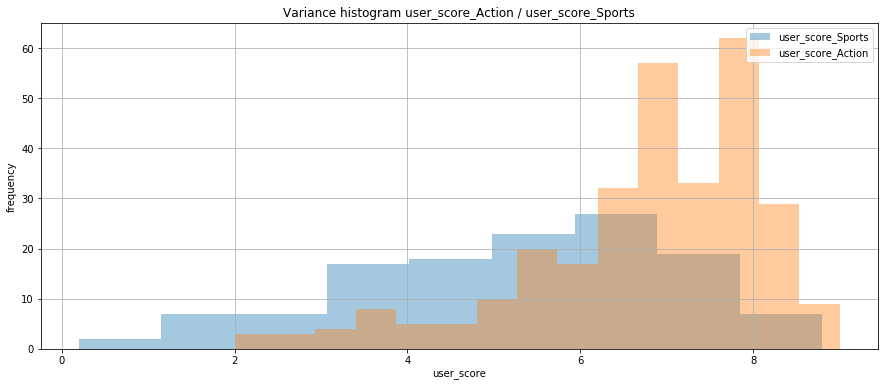

In [81]:
loc_metrics(user_score_action, user_score_sports, 'user_score_Action', 'user_score_Sports')

Размер выборки для жанра "Action" - 246 значения, для "Sports" - 122 значения. Дисперсия и стандартное отклонение для жанра "Sports" выше. Уровни максимальных и минимальных оценок примерно равны. Для обеих выборок характерно смещение данных влево (среднее меньше медианы) - значительное число очень низких оценок.

Будем исходить из того, что выборки по разным жанрам не зависят друг от друга. Исследуемые выборки разного размера (733 и 1361 значения), поэтому укажем параметр equal_var = False. Критический уровень статистической значимости определим в 5%.

In [82]:
results = st.ttest_ind(
    user_score_action, 
    user_score_sports)
print('p-значение: ', results.pvalue)

alpha = .05

if  results.pvalue > alpha:
    display("Отвергаем нулевую гипотезу")
else:
    display("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  2.8711147985105864e-19


'Не получилось отвергнуть нулевую гипотезу'

Нулевая гипотеза о неравенстве средних пользовательских оценок для жанров  "Action" и "Sports" не может быть отвергнута. Вероятность наступления события равенства средних оценок для выбраных жанров черезвычайно мала и значительно меньше принятого уровня стaтистической значимости. Вероятнее всего, жанр "Action", будучи самым популярным будет практически всегда иметь более высокие средние оценки - рынок игр в досточно большой степени ориентирован на него. 

### Вывод

Для полученных данных были проведены проверки двух гипотез:
1. Средние пользовательские рейтинги платформ "XBox One" и "PC" одинаковые;
2. Средние пользовательские рейтинги жанров "Action"  и "Sports" разные.

В качестве уровня статистической значимости приято значение 0.05. Для проверки гипотез были сформулированы нулевая и альтернативные гипотезы.В качестве метода проверки был использован метод scipy.stats.ttest_ind() с учетом параметра equal_var=False (в обоих случаях выборки различаются размерами). Для гипотезы "Средние пользовательские рейтинги платформ "XBox One" и "PC" одинаковые"  нулевая гипотеза не может быть отвергнута (вероятность получения одинаковых средних оценок для разных платформ достаточно велика с учетом принятого коэффициента статистической значимости). Для гипотезы "Средние пользовательские рейтинги жанров "Action"  и "Sports" разные" не может быть отвергнута (средние оценки для разных жанров также как правило различаются).

## Общий вывод

База исследования - файл формата .csv содержащий информацию о продажах игр за 37 лет до 2016 года. Файл содержит информацию о названии проданных игр, годах их выпуска, жанре, платформе и объемах продаж на рынках Северной Амерки, Евросоюза, Японии и других рынках.

Целью исследования является выявление определяющих успешность игры (большой объем продаж) закономерностей. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

В ходе исследования было проведено:

 - Ознакомление с данными и их изучение, установлено следующее: таблица включает данные о 11559 уникальных играх в 12 жанрах на 31 игровой платформе, созданных в течении 37 лет (с 1980 по 2016 год); в 6 столбцах из 11 присутсвуют пропуски данных; полные дубликаты отсутсвуют.
 - Предобработка данных, включая следующие операции: 
   * приведение наименований столбцов к "змеинному" стилю;
   * замена типов данных: 'year_of_release' - прведен к целочисленному типу (Int64), 'critic_score' - приведен к целочисленному типу (Int64), 'user_score' - после замены аббревиатуры "tbd" (по сути пропуск данных) - к формату вещественного числа (float);
   * замена пропущенных значений (адекватная замена произведена в 111 строках столбца 'year_of_release'), в столбце 'rating' аббревиатура "RP" заменена на пропуски;
   * расчет значений и добавление столбца с сумарными объемами продаж по всему миру 'total_sales'.
 - Исследовательский анализ данных по нескольким направлениям:
      1. Исследование динамики объемов выпущенных игр: установлено, что развитие индустрии компьтерных игр началось в 1990-х годах, пик разноабразия выпущенных игр пришелся на 2008-2009 г, далее объемы выпуска снижались ввиду изменения технологий и появления новых форматов распотранения игр и их монетезации.
      2. Исследование динамики объемов продаж по игровым платформам: установленны (по объему продаж за время существования платформы) самые популярные игровые платформы (Play Station2, XBox360, Play Station3 в порядке убывания). Для дальнейших исследований выделены наиболее популярные платформы с объемом продаж выше медианного значения по всем платформам.
      3. На основании данных о самых популярных платформах определен примерный временной отрезок существования платформы (6,5 лет).
      4. В качестве актуального периода принят отрезок в 3 года.
      5. Исследование продаж игр на актуальном периоде: определены параметры успешности платформ на основе данных об объемах продаж, для актуального периода исследования определены перспективные на последний год предсталенных данных платформы: "Play Station4" и "XBox One". Определены лидеры продаж, и платформы, которые с большой вероятносью закончат существование в скором времени.
      6. Исследование влияния оценок критиков и пользователей на продажи: установленно, что в большей степени покупка игр зависит от оценки критиков (слабовыраженная положительная связь), а не от отзывов игроков (маловыраженная положитльная и отрицательные связи), однако существуют платформы, для которых оценки критиков и пользователей в принципе не оказывают большого влияния на решение о покуке игры.
      7. Исследование характеристики жанра игры: установлены самые популярные ("Shooter", "Action") и непопулярные жанры, можно заключить, что жанр игры - один из критериев, влияющих на объем ее продаж
 - Исследование региональных продаж (Северная Америка, Евросоюз, Япония): примерный "портрет" пользователей на рзличных рынках выглядит следующим образом: пользователи Северной Америки и Евросоюза достаточно похожи - это дети, подростки и в четверти случаев взрослые люди, предпочитающие стационарные игровые платформы("XBox360", "Play Station3". "Nintendo Wii") и динимачные жанры игр("Action", "Sport", "Shooter"); пользователи Японии имеют серьезные отличия - это в основном  дети и подростки (и только в 1/10 случаев взрослые люди), предпочитающие мобильные игровые платформы("Nintendo DS", "Nintendo 3DS". "Play Saton Portable"), также любящие динимачные жанры игр("Action", "Sport"), исключая "Shooter", но больше всего предпочитающие ролевые игры "Role-Playing".
 - Проверка гипотез о рейтингах игровых платформ и жанров в ходе которй были проверены 2 гипотезы: "Средние пользовательские рейтинги платформ "XBox One" и "PC" одинаковые", "Средние пользовательские рейтинги жанров "Action"  и "Sports" разные". В каждом случае сформулированы нулевые и альтернативные гипотезы, определен уровень статистической значимости. В ходе проверки гипотез установлено следущее: для гипотезы "Средние пользовательские рейтинги платформ "XBox One" и "PC" одинаковые"  нулевая гипотеза не может быть отвергнута. Для гипотезы "Средние пользовательские рейтинги жанров "Action"  и "Sports" разные" не может быть отвергнута.

Таким образом, для планирования рекламных компаний и оптимизации продаж, необходимо учитывать время жизненного цикла платформы (на момент выгрузки данных большинство платформ прекращало существование, перспективными являлись "Play Station4"(2013), "XBox One"(2013)), жанровые предпочтения пользователей, востребованность игр на определенных платформах, а также другие особенности отдельных региональных рынков (например, связанные с возрастным цензом). Необходимо также отметить, что самым большим рынком компьютерных игр является рынок Северной Америки, далее по убыванию - Евросоюза , Японии и остальных стран.
